[Дашборд](https://datalens.yandex/trfma9jgu7hqh?tab=Ja)

<center><font size=6><b>АНО Рак победим</b></font></center>





<center><font size=4><b>Описание</b></font></center>


Заказчик предоставил данные в двух файлах о подопечных фонда и о донорах фонда.

Из-за несовершенства сбора данных информация в полях датасета представлена в разрозненном виде. Необходимо привести к единообразию написание значений в полях.

Основная задача проекта - построение двухстраничного дашборда. Для подопечных важно отразить:
-	географию подопечных и доноров
-	возраст
-	таблицу с датой рождения с фильтром по текущей дате - чтобы было видно, когда поздравить подопечных с Дем Рождения
-	динамику заполнения анкет по полю “Дата заполнения анкеты”
-	откуда узнали о фонде
-	сферу деятельности подопечных
-	диагнозы подопечных
-	стадия лечения
-	какая требуется помощь
-	динамика
-	можно предложить другие интересные метрики, которые возможно рассчитать и отразить на дашборде.

Для доноров:
-	тип платежа
-	платёжный оператор
-	способы платежа
-	динамика платежей
-	суммы
-	статусы
-	кампании
-	другие интересные инстайты и метрики, которые возможно рассчитать и отобразить на дашборде.

<center><font size=4><b>Цель и задачи</b></font></center>

**Цель**: построение двухстраничного дашборда. На первой странице (вкладке) которого будет отражены метрики по подопечным фонда, на второй странице (вкладке) – метрики по донорам фонда.

**Задачи**:
1. Загрузить данные.
2. Провести предобработку, опираясь на справочник.
3. Анализ данных.
4. Построение дашборда.

<center><font size=4><b>Описание данных</b></font></center>

|Данные о подопечных:     | Данные о донорах|
         :---:            |       :---:     |
ФИО                       |ID пожертвования
Email                     |ID донора
Телефон                   |Тип платежа
Дата рождения             |Плат. оператор
Город                     |Способ платежа
Сфера деятельности        |Полная сумма
Диагноз                   |Дата и время пожертвования
Этап                      |Статус
Помощь                    |Подписка на рассылку
Группы                    |Дата пожертвования
Как у знали               |
Дата заполнения анкеты    |
id запроса                |
Дата отправки анкеты      |
Сайт                      |
Название заполненной формы|



<center><font size=5><b>СОДЕРЖАНИЕ</b></font></center>

>[1 Загрузка и просмотр данных](#scrollTo=wzaQyknRSWq6)

>[2 Предобработка данных](#scrollTo=F4HxJyDf0nsm)

>>[2.1 Обработка названий столбцов](#scrollTo=SF-eHD9iZTb-)

>>[2.2 Обработка пропусков и типов данных](#scrollTo=NVyneRVIvPts)

>>>[2.2.1 Подопечные](#scrollTo=fQVKLcLfv55X)

>>>[2.2.2 Доноры](#scrollTo=L8Wsc_XP4u0Y)

>>[2.3 Обработка значений в столбцах](#scrollTo=pA_AGvjO7N1P)

>>>[2.3.1 Город](#scrollTo=m-rWVB3N7ki7)

>>>[2.3.2 Сфера деятельности](#scrollTo=bSWQSg_tRCWr)

>>>[2.3.3 Диагноз](#scrollTo=FuDkZk21sWx3)

>>>[2.3.4 Этап](#scrollTo=4adyeSUwrTG6)

>>>[2.3.5 Помощь](#scrollTo=h4730EzErVXe)

>>>[2.3.6 Откуда узнали](#scrollTo=vaT428RutxkR)

>>>[2.3.7 Этап лечения](#scrollTo=ljeaOObvwn2k)

>>[2.4 Добавление полигонов](#scrollTo=unZ037AkEVQS)

>[3 EDA](#scrollTo=z9NG16rgrfn3)

>>[3.1 Количество доноров и транзакций](#scrollTo=yOrpPLQh3S5I)

>>[3.2 Распределение типов платежей](#scrollTo=FdWElEgp3ekz)

>>[3.3 Распределение операторов платежей](#scrollTo=KXFs-KyYrbJX)

>>[3.4 Распределение методов платежей](#scrollTo=Woey1n26CZnB)

>>[3.5 Распределение статусов](#scrollTo=5jNTl0DJCxNj)

>>[3.6 Распределение подписок](#scrollTo=LzkJuVvqEcN4)

>>[3.7 Динамика пожертвований](#scrollTo=1xykdw4sG8RA)

>>>[3.7.1 Общая](#scrollTo=HlzhUGGRHToG)

>>>[3.7.2 По типу платежей](#scrollTo=breod-0VJmIJ)

>>>[3.7.3 По оператору платежей](#scrollTo=01KzNFeoL4hf)

>>>[3.7.4 По методу платежей](#scrollTo=chdgJ2kML5-5)

>[4 Вывод](#scrollTo=3U-IuDdch94X)



<center><font size=4><b>Практическая часть</b></font></center>

# 1 Загрузка и просмотр данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import requests
from io import BytesIO
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import roman

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8")

warnings.filterwarnings('ignore')

In [3]:
# загрузим данные о подопечных
df = pd.read_csv('https://drive.google.com/uc?export=download&id=14rNvD4yz0rcXTlcK2tv', decimal=',')
df.head()

,ФИО,Email,Телефон,Дата рождения,Город,Сфера деятельности,Диагноз,Этап,Помощь,Группы,Как у знали,Дата заполнения анкеты,requestid,sent,referer,Form name
0,User_01_01,Email_0001,tel_number_0001,15/11/1969,Краснодар Краснодарский край,Бухгалтер,"РМЖ, 1с стадия",Ремиссия,Информационную,Клуб “Рак Победим”,Знакомые,21/10/2021,3284862:2572982821,21/10/2021,http://rak-pobedim.com/anketa,Анкета участника
1,User_01_02,Email_0002,tel_number_0002,20/08/1982,г. Пушкин Санкт-Петербург,Медицина,Мальт лимфома желудка,Ещё не начала лечение,NaN,#ЛовлюЭмоции; Клуб “Рак Победим”; Анонсы организации; Дари Эмоции,Интернет,21/10/2021,3284862:2575517051,21/10/2021,http://rak-pobedim.com/anketa,Анкета участника
2,User_01_03,Email_0003,tel_number_0003,09/06/1976,Сургут ХМАО,Пенсионер инвалид 3 гр,Рак шейки матки 3 С стадии,Лучевая терапия,"Денежную. На лучевую ехать в другой город. Жилье, дорога, еда все за свой счет.В Хантах я пробуду месяц. Помогите пожалуйста.",Клуб “Рак Победим”,Интернет,22/10/2021,3284862:2579157551,22/10/2021,http://rak-pobedim.com/anketa,Анкета участника
3,User_01_04,Email_0004,tel_number_0004,19/12/1960,Ростов-на-Дону,Медицина,"РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",Принимаю гармон и прохожу раз в год полное обследования,"Уверенность и избавиться от страхов , полезную информацию.",#ЛовлюЭмоции; Клуб “Рак Победим”; Дари Эмоции,Знакомые,22/10/2021,3284862:2579657471,22/10/2021,http://rak-pobedim.com/anketa,Анкета участника
4,User_01_05,Email_0005,tel_number_0005,09/07/1967,Нижний Новгород Нижегородская область,Менеджер по туризму,"РМЖ, 2 а",Гормонотерапия,NaN,#ЛовлюЭмоции; Клуб “Рак Победим”,Интернет,24/10/2021,3284862:2589075031,24/10/2021,http://rak-pobedim.com/anketa,Анкета участника


In [4]:
# загрузим данные о донорах
df_don = pd.read_csv('https://drive.google.com/uc?export=download&id=1A8mYv7AGFfFmBjzqHYR06',
                     decimal=',')
df_don.head()

,ID пожертвования,ID донора,Тип платежа,Плат. оператор,Способ платежа,Полная сумма,Дата пожертвования,Статус,Подписка на рассылку,Date
0,1718,ba6dd3720fda6849141f824071088a35b53e5269ff8e99e288fc9e63016bbb06,Разовое,CloudPayments,Банковская карта,4500,"15.01.2024, 15:15",Оплачено,Нет,1/15/2024
1,1717,ba6dd3720fda6849141f824071088a35b53e5269ff8e99e288fc9e63016bbb06,Разовое,CloudPayments,Банковская карта,4500,"15.01.2024, 15:10",Попытка пожертвовать,Нет,1/15/2024
2,1715,bc934837f1cac51334c536e54b5c574d9f64acea7d45334ced3941c2b1cfffd7,Все рекуррентные платежи,CloudPayments,Банковская карта,300,"15.01.2024, 12:42",Оплачено,Нет,1/15/2024
3,1714,41d91df30bf6a7a03a07f75a3e85304eab2913f1ecf3313a5303c213f6cf62f7,Разовое,CloudPayments,Банковская карта,750,"15.01.2024, 10:00",Оплачено,Нет,1/15/2024
4,1713,41d91df30bf6a7a03a07f75a3e85304eab2913f1ecf3313a5303c213f6cf62f7,Разовое,CloudPayments,Банковская карта,750,"15.01.2024, 09:55",Попытка пожертвовать,Нет,1/15/2024


In [5]:
# загрузим справочник
# уникальный идентификатор google таблицы
spreadsheet_id = '1ODxYYhWq1OMntpGo9gD8jYKJQV6lGfw0f'

# URL для экспорта данных таблицы в формате CSV с использованием идентификатора
file_name = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=xlsx'

# GET-запрос к Google Sheets API для получения данных в формате CSV
r = requests.get(file_name)

# читаем данные в DataFrame
directory = pd.ExcelFile(BytesIO(r.content))

In [6]:
# выведем названия листов справочника
directory.sheet_names

['Заявитель',
 'Сфера деятельности',
 'Локализация',
 'Стадия',
 'Этап лечения',
 'Помощь',
 'Как узнали',
 'Города',
 'Регионы']

In [7]:
# создадим таблицы с нужными листами справочника
cities = directory.parse('Города', index_col=0)
field = directory.parse('Сфера деятельности')
localization = directory.parse('Локализация')
stage = directory.parse('Стадия')
help = directory.parse('Помощь')
treatment_stage = directory.parse('Этап лечения')
info = directory.parse('Как узнали')

In [8]:
# выясним размеры датафреймов
df.shape

(1568, 16)

In [9]:
df_don.shape

(581, 10)

Данные о подопечных содержат 1568 строк и 16 столбцов.

Данные о донорах содержат 581 строку и 10 столбцов.

# 2 Предобработка данных

## 2.1 Обработка названий столбцов

In [10]:
# приведем названия столбцов к правильному написанию
# создадим список новых столбцов для подопечных
new_columns_df = ['name',
                  'email',
                  'phone',
                  'birthdate',
                  'city',
                  'field',
                  'diagnosis',
                  'treatment_stage',
                  'help',
                  'group',
                  'info',
                  'date_fill_form',
                  'request_id',
                  'sent',
                  'refer',
                  'form_name']

# создадим список новых столбцов для доноров
new_columns_df_don = ['id',
                      'donor_id',
                      'payment_type',
                      'payment_operator',
                      'payment_method',
                      'sum',
                      'datetime_donation',
                      'status',
                      'subscription',
                      'date_donation']

In [11]:
# заменим названия столбцов
df.columns = new_columns_df
df_don.columns = new_columns_df_don

In [12]:
# избавимся от ненужных для анализа колонок
df = df.drop(columns=['email', 'phone', 'group', 'date_fill_form',
                      'request_id', 'refer', 'form_name'])

In [13]:
df.columns

Index(['name', 'birthdate', 'city', 'field', 'diagnosis', 'treatment_stage',
       'help', 'info', 'sent'],
      dtype='object')

In [14]:
df_don.columns

Index(['id', 'donor_id', 'payment_type', 'payment_operator', 'payment_method',
       'sum', 'datetime_donation', 'status', 'subscription', 'date_donation'],
      dtype='object')

Названия стобцов приведены к стандартизированному виду.

## 2.2 Обработка пропусков и типов данных




### 2.2.1 Подопечные

In [15]:
# выведем информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             1568 non-null   object
 1   birthdate        1493 non-null   object
 2   city             1565 non-null   object
 3   field            1377 non-null   object
 4   diagnosis        1566 non-null   object
 5   treatment_stage  1542 non-null   object
 6   help             780 non-null    object
 7   info             1520 non-null   object
 8   sent             1568 non-null   object
dtypes: object(9)
memory usage: 110.4+ KB


In [16]:
# создадим функцию
def nan_count(column):
  '''
  Данная функция получает на вход колонку, считает в ней количество пустых строк,
  посчитывает процент пустых строк от общего количества в датафрейме
  '''

  # количество пустых строк
  nan_rows = df[column].isna().sum()

  # размер датафрейма
  rows = df.shape[0]

  return print(f'''Колонка: {column}. Пустые строки: {nan_rows}.
Относительно датафрейма: {round(nan_rows / rows * 100, 2)}%
''')

In [17]:
# применим функцию ко всем столбцам с пропусками
for column in df.columns:
  if df[column].isna().sum() > 0:
    nan_count(column)

Колонка: birthdate. Пустые строки: 75.
Относительно датафрейма: 4.78%

Колонка: city. Пустые строки: 3.
Относительно датафрейма: 0.19%

Колонка: field. Пустые строки: 191.
Относительно датафрейма: 12.18%

Колонка: diagnosis. Пустые строки: 2.
Относительно датафрейма: 0.13%

Колонка: treatment_stage. Пустые строки: 26.
Относительно датафрейма: 1.66%

Колонка: help. Пустые строки: 788.
Относительно датафрейма: 50.26%

Колонка: info. Пустые строки: 48.
Относительно датафрейма: 3.06%



Проверим, есть ли у нас дубликаты по ФИО подопечного. Возможно в дублирующихся строках будет информация, которой нет в другой дублирующейся строке.

In [18]:
# количество дубликатов
df['name'].duplicated().sum()

0

Дублирующихся подопечных нет. Заполним пропуски значением "Неизвестно", так как уточнить данные по подопечным мы не можем.

Пропуски в датах заполним заглушкой типа даты.

In [19]:
df['birthdate'] = df['birthdate'].fillna('01/01/1900')

In [20]:
# приведем столбцы с датами к правильному типу
df['birthdate'] = pd.to_datetime(df['birthdate'], format='%d/%m/%Y')
df['sent'] = pd.to_datetime(df['sent'], format='%d/%m/%Y')

In [21]:
# заполним остальные пропуски
df = df.fillna('неизвестно')

In [22]:
# выведем информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             1568 non-null   object        
 1   birthdate        1568 non-null   datetime64[ns]
 2   city             1568 non-null   object        
 3   field            1568 non-null   object        
 4   diagnosis        1568 non-null   object        
 5   treatment_stage  1568 non-null   object        
 6   help             1568 non-null   object        
 7   info             1568 non-null   object        
 8   sent             1568 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(7)
memory usage: 110.4+ KB


В таблице подопечных удалены лишние столбцы, заполнены пропуски и данные приведены к нужному типу.

### 2.2.2 Доноры

In [23]:
# выведем инфо
df_don.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 581 non-null    int64 
 1   donor_id           581 non-null    object
 2   payment_type       581 non-null    object
 3   payment_operator   581 non-null    object
 4   payment_method     581 non-null    object
 5   sum                581 non-null    int64 
 6   datetime_donation  581 non-null    object
 7   status             581 non-null    object
 8   subscription       581 non-null    object
 9   date_donation      581 non-null    object
dtypes: int64(2), object(8)
memory usage: 45.5+ KB


Пропусков нет. Приведем типы данных к правильной форме.

In [24]:
df_don['datetime_donation'] = (
    pd.to_datetime(df_don['datetime_donation'], format='%d.%m.%Y, %H:%M')
)
df_don['date_donation'] = (
    pd.to_datetime(df_don['date_donation'], format='%m/%d/%Y')
)

In [25]:
df_don.head()

,id,donor_id,payment_type,payment_operator,payment_method,sum,datetime_donation,status,subscription,date_donation
0,1718,ba6dd3720fda6849141f824071088a35b53e5269ff8e99e288fc9e63016bbb06,Разовое,CloudPayments,Банковская карта,4500,2024-01-15 15:15:00,Оплачено,Нет,2024-01-15
1,1717,ba6dd3720fda6849141f824071088a35b53e5269ff8e99e288fc9e63016bbb06,Разовое,CloudPayments,Банковская карта,4500,2024-01-15 15:10:00,Попытка пожертвовать,Нет,2024-01-15
2,1715,bc934837f1cac51334c536e54b5c574d9f64acea7d45334ced3941c2b1cfffd7,Все рекуррентные платежи,CloudPayments,Банковская карта,300,2024-01-15 12:42:00,Оплачено,Нет,2024-01-15
3,1714,41d91df30bf6a7a03a07f75a3e85304eab2913f1ecf3313a5303c213f6cf62f7,Разовое,CloudPayments,Банковская карта,750,2024-01-15 10:00:00,Оплачено,Нет,2024-01-15
4,1713,41d91df30bf6a7a03a07f75a3e85304eab2913f1ecf3313a5303c213f6cf62f7,Разовое,CloudPayments,Банковская карта,750,2024-01-15 09:55:00,Попытка пожертвовать,Нет,2024-01-15


Проверим совпадают ли даты в столбцах 'datetime_donation' и 'date_donation'.

In [26]:
(df_don['datetime_donation'].dt.date == df_don['date_donation']).sum()

581

Все даты совпадают.

In [27]:
# выведем информацию о таблице
df_don.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 581 non-null    int64         
 1   donor_id           581 non-null    object        
 2   payment_type       581 non-null    object        
 3   payment_operator   581 non-null    object        
 4   payment_method     581 non-null    object        
 5   sum                581 non-null    int64         
 6   datetime_donation  581 non-null    datetime64[ns]
 7   status             581 non-null    object        
 8   subscription       581 non-null    object        
 9   date_donation      581 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 45.5+ KB


В таблице о донорах нет пропусков и данные приведены к правильному типу.


## 2.3 Обработка значений в столбцах

Воспользовавшись справочником нужно изменить значения в столбцах.

### 2.3.1 Город

In [28]:
# создадим список городов и регионов из справочника
city_reg_list = list(cities['name'] + ' '+ cities['region'])
city_reg_list[:10]

['Красный Сулин Ростовская область',
 'Сальск Ростовская область',
 'Дигора Республика Северная Осетия-Алания',
 'Моздок Республика Северная Осетия-Алания',
 'Ардон Республика Северная Осетия-Алания',
 'Алагир Республика Северная Осетия-Алания',
 'Курильск Сахалинская область',
 'Партизанск Приморский край',
 'Семикаракорск Ростовская область',
 'Белая Калитва Ростовская область']

In [29]:
df1 = df.copy()

In [30]:
df1.sample(5)

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent
550,User_01_551,1963-04-02,Санкт-Петербург,Пенсионер,Рак яичников,Химиотерапия,Приятные эмоции,Интернет,2022-11-24
179,User_01_180,1988-09-21,Уфа Башкортостан,Эколог,РМЖ 3 ст,Радио лучевая терапия,неизвестно,Интернет,2022-01-12
560,User_01_561,1983-11-26,Нижний Новгород Нижегородская область,Дизайн,"РМЖ, 2ст",Химиотерапия после мастэктомии,"Эмоции, надежду, физические занятия после мастэктомии",Интернет,2022-11-29
306,User_01_307,1972-09-11,Новосибирск Новосибирская область,ИП,"РМЖ, 1 стадия, метастазы в печень",Гормональная терапия,"Общение, мероприятия, психологическая поддержка, консультации врачей",Интернет,2022-04-25
180,User_01_181,1900-01-01,Симферополь Крым,неизвестно,Болеет муж Рак легких 2б,Химия,Ответы на вопросы,Интернет,2022-01-13


In [31]:
# создадим столбцы названия города и степени равенства
# будем искать совпадения в столбце 'city' со списокм городов из справочника
df1[['city_1', 'score_city']] = (
    df1['city'].apply(lambda x: process.extractOne(x, city_reg_list))
    .apply(pd.Series)
)

In [32]:
df1.sample(10)

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,city_1,score_city
370,User_01_371,1979-03-20,Ростов-на-Дону на Дону,Школа,Рак прямой кишки 3 ст,Химия,"Эмоциональная поддержка, советы по питанию",Знакомые,2022-06-04,Ростов-на-Дону Ростовская область,86
1326,User_01_1327,1977-04-12,Ставрополь Ставропольский край,"Шитье, но пока дома с маленькими детьми",РМЖ 4 стадия,Химиотерапия,"Умер муж, живу с двумя детками 5 лети 1.7лет. Пособий не хватает. Пытаюсь работать.",Интернет,2021-04-27,Ставрополь Ставропольский край,100
1234,User_01_1235,1966-12-01,Ростов-на-Дону,Врач,Аденокарцинома яичника 1 ст.,Наблюдение каждые 3 мес.,Помощь в ловле положительных эмоций,Знакомые,2021-03-24,Ростов-на-Дону Ростовская область,90
1225,User_01_1226,1948-10-19,Ростов -на-Дону,Пенсионер,РМЖ 2 стадии,Ремиссия,неизвестно,Интернет,2021-03-24,Ростов-на-Дону Ростовская область,86
1030,User_01_1031,1976-07-03,Москва,Продавец,РМЖ 2 стадия,Ремиссия,неизвестно,Знакомые,2023-10-07,Москва Москва,90
555,User_01_556,1988-12-30,Новосибирск,Менеджер,РШМ 3ст,Химиотерапия,Такси до места лечения,Интернет,2022-11-25,Новосибирск Новосибирская область,90
866,User_01_867,1968-01-11,Энгельс Саратовская область,воспитатель ( школа- интернат),РМЖ 1 стадия,лечение ( тамоксифен),"консультацию по питанию, по приёму витаминов",Знакомые,2023-07-15,Энгельс Саратовская область,100
578,User_01_579,1992-05-09,Самара Самарская область,Менеджер,РМЖ 1ст,Подготовка к операции,Позитивные эмоции,Интернет,2022-12-07,Самара Самарская область,100
446,User_01_447,1982-06-22,Ростов-на-Дону,педагог,РМЖ 2 стадия,химиотерапия,неизвестно,Знакомые,2022-08-01,Ростов-на-Дону Ростовская область,90
345,User_01_346,1975-03-28,Ростов-на-Дону,Логопед,РШМ,неизвестно,неизвестно,Знакомые,2022-05-23,Ростов-на-Дону Ростовская область,90


In [33]:
# выведем города с оценкой ниже 70
df1[df1['score_city'] < 70]['city'].unique()

array(['Николаев Украина', 'Антрацит, ЛНР', 'Луганск, ЛНР',
       'Житомир Украина', 'Гомель Белорусия', 'Минск Белорусия',
       'Астана Кахахстан', 'Диярбакыр Турция', 'Вена Австрия',
       'п. Тазовский ЯНАО', 'Нур-Султан Казахстан', 'Тараз Казахстан',
       'Великобретания', 'Сток-он-Трент Великобритания',
       'Бишкек Киргизия', 'Витебск Беларусь', 'неизвестно',
       'Астана Казахстан', 'Новополоцк Беларусь', 'Минск Беларусь',
       'Брест Беларусь', 'Луганск ЛНР', 'Пицунда Абхазия',
       'Шымкент Казахстан', 'Макеевка ДНР',
       'Село Чалтырь с/т Донец Ростов-на-дону', 'Таллинн Эстония',
       'Пехларн Австрия', 'Самбор Украина', 'Гродно Беларусь',
       'Гагра Абхазия', 'Душанбе Таджикистан', 'Кипения, Северный Кипр',
       'Торонто Канада', 'Брест Белорусия', 'Чебоксары Чувашская',
       'Орша Белорусия', 'Кишинёв Молдавия', 'Алмата Казахстан',
       'Темиртау Казахстан', 'Даугавпилс Латвия',
       'Луганск - Красногорск ЛНР', 'Винница Украина', 'Берлин Герма

Большинство неправильно определенных городов находятся не на территории России. Исключением является п. Тазовский ЯНАО, Село Чалтырь с/т Донец Ростов-на-дону, Чебоксары Чувашская и значение "неизвестно". Так как нам понадобятся координаты городов, а в справочнике нет городов не из России, воспользуемся Интернетом для поиска координат.

In [34]:
# посмотрим определившиеся города России с низким процентом совпадений
# и значение городоа 'неизвестно'
df1[df1['city'].isin(['п. Тазовский ЯНАО',
                      'Село Чалтырь с/т Донец Ростов-на-дону',
                      'Чебоксары Чувашская', 'неизвестно'])]

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,city_1,score_city
201,User_01_202,1983-10-06,п. Тазовский ЯНАО,Юрисконсульт,"Гигантоклеточная опухоль кости, 1 стадия",Терапия,"Психологическую, юридическую",Интернет,2022-01-23,Назарово Красноярский край,53
463,User_01_464,1957-08-20,неизвестно,Пенсионерка,"Рак правого яичника, 3 стадия",Химиотерапия,Советы,Знакомые,2022-08-27,Северск Томская область,54
563,User_01_564,1970-09-03,неизвестно,неизвестно,неизвестно,Химия,неизвестно,Интернет,2022-11-29,Северск Томская область,54
626,User_01_627,1984-01-27,Село Чалтырь с/т Донец Ростов-на-дону,Вяжу сумочки/авоськи,РМЖ 2 ст,Гормонотерапия,Консультации,Интернет,2023-01-22,Ростов-на-Дону Ростовская область,57
1098,User_01_1099,1967-06-11,неизвестно,неизвестно,неизвестно,Химиотҽраия,неизвестно,Интернет,2023-11-13,Северск Томская область,54
1344,User_01_1345,1968-10-04,Чебоксары Чувашская,Менеджер-дизайнер мебели,РМЖ 2стадия.отдаленные мтс,Иммунотерапия,неизвестно,Интернет,2021-05-02,Чебоксары Республика Чувашия,68
1353,User_01_1354,1972-06-01,Чебоксары Чувашская,Не работаю,РМЖ с мтс,"Таргет, гормоны, бифосфонаты",неизвестно,Интернет,2021-05-02,Чебоксары Республика Чувашия,68


Только у села и поселка неправильно определился город. Оставим как есть. Для удобства заменим оценку.

In [35]:
df1.loc[df1['city'].isin(['п. Тазовский ЯНАО',
                          'Село Чалтырь с/т Донец Ростов-на-дону',
                          'Чебоксары Чувашская', 'неизвестно']),
        'score_city'] = 70

In [36]:
# выведем неточные строки с городами в отдельный датафрейм
df1_less = df1[df1['score_city'] < 70]

# в изначальном датафрейме оставим все значения больше или равно 70
df1 = df1[df1['score_city'] >= 70]

In [37]:
# выведем уникальные значения городов
df1_less['city'].unique()

array(['Николаев Украина', 'Антрацит, ЛНР', 'Луганск, ЛНР',
       'Житомир Украина', 'Гомель Белорусия', 'Минск Белорусия',
       'Астана Кахахстан', 'Диярбакыр Турция', 'Вена Австрия',
       'Нур-Султан Казахстан', 'Тараз Казахстан', 'Великобретания',
       'Сток-он-Трент Великобритания', 'Бишкек Киргизия',
       'Витебск Беларусь', 'Астана Казахстан', 'Новополоцк Беларусь',
       'Минск Беларусь', 'Брест Беларусь', 'Луганск ЛНР',
       'Пицунда Абхазия', 'Шымкент Казахстан', 'Макеевка ДНР',
       'Таллинн Эстония', 'Пехларн Австрия', 'Самбор Украина',
       'Гродно Беларусь', 'Гагра Абхазия', 'Душанбе Таджикистан',
       'Кипения, Северный Кипр', 'Торонто Канада', 'Брест Белорусия',
       'Орша Белорусия', 'Кишинёв Молдавия', 'Алмата Казахстан',
       'Темиртау Казахстан', 'Даугавпилс Латвия',
       'Луганск - Красногорск ЛНР', 'Винница Украина', 'Берлин Германия',
       'Актау Казахстан'], dtype=object)

Для того, чтобы в конце предобработки добавить координаты границ для отображения на дашборде, добавим пометку страны Россия - заграница. Для ЛНР и ДНР полигоны не были найдены, поэтому оставим как есть.

In [38]:
df1['country'] = 'Россия'
df1_less['country'] = 'заграница'

In [39]:
# удалим запятые
df1_less['city'] = df1_less['city'].str.replace(',', '')

# заменим название города
df1_less['city'] = df1_less['city'].str.replace('Нур-Султан', 'Астана')

# устраним опечатку
df1_less['city'] = df1_less['city'].str.replace('Великобретания',
                                                'Великобритания')

In [40]:
df1_less['city'].unique()

array(['Николаев Украина', 'Антрацит ЛНР', 'Луганск ЛНР',
       'Житомир Украина', 'Гомель Белорусия', 'Минск Белорусия',
       'Астана Кахахстан', 'Диярбакыр Турция', 'Вена Австрия',
       'Астана Казахстан', 'Тараз Казахстан', 'Великобритания',
       'Сток-он-Трент Великобритания', 'Бишкек Киргизия',
       'Витебск Беларусь', 'Новополоцк Беларусь', 'Минск Беларусь',
       'Брест Беларусь', 'Пицунда Абхазия', 'Шымкент Казахстан',
       'Макеевка ДНР', 'Таллинн Эстония', 'Пехларн Австрия',
       'Самбор Украина', 'Гродно Беларусь', 'Гагра Абхазия',
       'Душанбе Таджикистан', 'Кипения Северный Кипр', 'Торонто Канада',
       'Брест Белорусия', 'Орша Белорусия', 'Кишинёв Молдавия',
       'Алмата Казахстан', 'Темиртау Казахстан', 'Даугавпилс Латвия',
       'Луганск - Красногорск ЛНР', 'Винница Украина', 'Берлин Германия',
       'Актау Казахстан'], dtype=object)

In [41]:
# выведем город и регион в отдельную таблицу
for_city_reg = df1_less['city'].str.split(expand=True).loc[:, 0:1]
for_city_reg

,0,1
22,Николаев,Украина
70,Антрацит,ЛНР
72,Луганск,ЛНР
132,Житомир,Украина
136,Гомель,Белорусия
146,Минск,Белорусия
148,Астана,Кахахстан
153,Диярбакыр,Турция
168,Минск,Белорусия
187,Вена,Австрия


In [42]:
# заполним значения
for_city_reg.iloc[for_city_reg[0] == 'Луганск', 1] = 'ЛНР'
for_city_reg.iloc[for_city_reg[0] == 'Великобритания', 1] = 'Великобритания'
for_city_reg = for_city_reg.replace('Кипения', 'Кирения')
for_city_reg.iloc[for_city_reg[0] == 'Кирения', 1] = 'Кипр'

In [43]:
df1_less[['city_1', 'region']] = for_city_reg[[0, 1]]

In [44]:
df1_less['city_1'].unique()

array(['Николаев', 'Антрацит', 'Луганск', 'Житомир', 'Гомель', 'Минск',
       'Астана', 'Диярбакыр', 'Вена', 'Тараз', 'Великобритания',
       'Сток-он-Трент', 'Бишкек', 'Витебск', 'Новополоцк', 'Брест',
       'Пицунда', 'Шымкент', 'Макеевка', 'Таллинн', 'Пехларн', 'Самбор',
       'Гродно', 'Гагра', 'Душанбе', 'Кирения', 'Торонто', 'Орша',
       'Кишинёв', 'Алмата', 'Темиртау', 'Даугавпилс', 'Винница', 'Берлин',
       'Актау'], dtype=object)

In [45]:
# создадим словарь город-координаты
city_coord = {'Николаев': [46.96763204123905, 31.983953665649175],
              'Антрацит': [48.119901844739985, 39.09090491341184],
              'Луганск': [48.56904289162989, 39.307518600107734],
              'Житомир': [50.26162438883453, 28.66770876129634],
              'Гомель': [52.43042829058604, 30.994508996078203],
              'Минск': [53.900392813377984, 27.56727355532622],
              'Астана': [51.16163369736248, 71.44661177373098],
              'Диярбакыр': [37.92508726007067, 40.209540730455025],
              'Вена': [48.21376177145625, 16.36867542628042],
              'Тараз': [42.900630803370944, 71.39529411679632],
              'Великобритания': [55.03328701642633, -3.267415414666981],
              'Сток-он-Трент': [53.00386700311324, -2.1831046813963626],
              'Бишкек': [42.8745811303001, 74.56782547422333],
              'Витебск': [55.19257882816397, 30.214117823806408],
              'Новополоцк': [55.53367994467794, 28.661803700447173],
              'Брест': [52.098939038743296, 23.76331029311948],
              'Пицунда': [43.166086129628525, 40.344802726811125],
              'Шымкент': [42.31894803564481, 69.58842940201806],
              'Макеевка': [48.045043442664465, 37.956937537216774],
              'Казань': [55.78767059695203, 49.129598986373594],
              'Таллинн': [59.434592985714076, 24.751963628407804],
              'Пехларн': [48.2110710718793, 15.215122445160818],
              'Самбор': [49.52102771033739, 23.20814220612153],
              'Гродно': [53.66943713338794, 23.822352835930108],
              'Гагра': [43.279942157675826, 40.271152231050664],
              'Душанбе': [38.560221182115, 68.78569776356606],
              'Кирения': [35.27771205457731, 33.27904600715947],
              'Торонто': [43.65208228625765, -79.39798210380681],
              'Орша': [54.51281972941772, 30.42647765673138],
              'Кишинёв': [47.20076006736187, 28.824607172688452],
              'Алмата': [43.2341968322714, 76.89963257491382],
              'Темиртау': [50.05068572293858, 72.95749889282602],
              'Даугавпилс': [55.88265875343886, 26.540174492161068],
              'Винница': [49.23326950600617, 28.46740164910687],
              'Берлин': [52.51801255979502, 13.391763130454246],
              'Актау': [43.65821365335831, 51.19504943453712]}

In [46]:
# применим словарь к датафрейму
df1_less['coords_city'] = df1_less['city_1'].map(city_coord)
df1_less.head()

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,city_1,score_city,country,region,coords_city
22,User_01_23,1975-01-01,Николаев Украина,Инвалидность,Рак яичников 4 стадии,На таргетной терапии,Эмоциональную,Интернет,2021-11-05,Николаев,62,заграница,Украина,"[46.96763204123905, 31.983953665649175]"
70,User_01_71,1980-10-05,Антрацит ЛНР,Педагог,"Рак печени, 4 ст, эпителиоидная гемангоэндотелиома","Химиотерапия, 5 курс",Консультацию по моему диагнощу,Знакомые,2021-12-10,Антрацит,49,заграница,ЛНР,"[48.119901844739985, 39.09090491341184]"
72,User_01_73,1975-07-08,Луганск ЛНР,Железная дорога,РМЖ 2Б,Послеоперационный,неизвестно,Знакомые,2021-12-10,Луганск,62,заграница,ЛНР,"[48.56904289162989, 39.307518600107734]"
132,User_01_133,1982-04-03,Житомир Украина,Предприниматель,"РМЖ, трипл с мутацией, стадия 4",Химиотерапия,"Опыт лечения, Советы для облегчения побочен, Советы по консультациям",Знакомые,2022-01-06,Житомир,54,заграница,Украина,"[50.26162438883453, 28.66770876129634]"
136,User_01_137,1978-11-06,Гомель Белорусия,Бухгалтер,РМЖ 4 стадия,"Химиотераия, операция.",неизвестно,Интернет,2022-01-07,Гомель,62,заграница,Белорусия,"[52.43042829058604, 30.994508996078203]"


In [47]:
# объединим столбцы город и регион
cities['city_reg'] = cities['name'] + ' ' + cities['region']
cities.head()

,name,type,region,coords,city_reg
id,,,,,
1,Красный Сулин,город,Ростовская область,"[47.8815133907,40.0553169561]",Красный Сулин Ростовская область
2,Сальск,город,Ростовская область,"[46.480396424,41.5374105563]",Сальск Ростовская область
3,Дигора,город,Республика Северная Осетия-Алания,"[43.1571481495,44.1545996296]",Дигора Республика Северная Осетия-Алания
4,Моздок,город,Республика Северная Осетия-Алания,"[43.7866865572,44.5958897793]",Моздок Республика Северная Осетия-Алания
5,Ардон,город,Республика Северная Осетия-Алания,"[43.1742767421,44.2909920696]",Ардон Республика Северная Осетия-Алания


In [48]:
# к основному датафрейму добавим столбец координат, города и области
df1 = (
    df1.merge(cities[['name', 'region', 'coords', 'city_reg']],
              how='left',
              left_on='city_1',
              right_on='city_reg')
)

# переименуем столбец
df1 = df1.rename(columns={'coords': 'coords_city'})

In [49]:
# для неизвестных городов заполним заглушками либо пропусками
df1.loc[df1['city'] == 'неизвестно', 'region'] = 'неизвестно'
df1.loc[df1['city'] == 'неизвестно', 'coords_city'] = np.nan
df1.loc[df1['city'] == 'неизвестно', 'name_y'] = 'неизвестно'

In [50]:
# оставим только нужные столбцы
df1['city'] = df1['name_y']
df1 = df1.drop(columns=['city_1', 'name_y', 'city_reg'])
df1 = df1.rename(columns={'name_x': 'name'})
df1.head()

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city
0,User_01_01,1969-11-15,Краснодар,Бухгалтер,"РМЖ, 1с стадия",Ремиссия,Информационную,Знакомые,2021-10-21,100,Россия,Краснодарский край,"[45.0638570738,39.0168838238]"
1,User_01_02,1982-08-20,Санкт-Петербург,Медицина,Мальт лимфома желудка,Ещё не начала лечение,неизвестно,Интернет,2021-10-21,95,Россия,Санкт-Петербург,"[59.9635417613,30.0671726475]"
2,User_01_03,1976-06-09,Сургут,Пенсионер инвалид 3 гр,Рак шейки матки 3 С стадии,Лучевая терапия,"Денежную. На лучевую ехать в другой город. Жилье, дорога, еда все за свой счет.В Хантах я пробуду месяц. Помогите пожалуйста.",Интернет,2021-10-22,86,Россия,Ханты-Мансийский автономный округ,"[61.2859995846,73.4180691785]"
3,User_01_04,1960-12-19,Ростов-на-Дону,Медицина,"РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",Принимаю гармон и прохожу раз в год полное обследования,"Уверенность и избавиться от страхов , полезную информацию.",Знакомые,2021-10-22,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]"
4,User_01_05,1967-07-09,Нижний Новгород,Менеджер по туризму,"РМЖ, 2 а",Гормонотерапия,неизвестно,Интернет,2021-10-24,100,Россия,Нижегородская область,"[56.2887663933,43.8725035119]"


In [51]:
# исправим колонки в df1_less
df1_less['city'] = df1_less['city_1']
df1_less = df1_less.drop(columns=['city_1'])
df1_less.head()

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city
22,User_01_23,1975-01-01,Николаев,Инвалидность,Рак яичников 4 стадии,На таргетной терапии,Эмоциональную,Интернет,2021-11-05,62,заграница,Украина,"[46.96763204123905, 31.983953665649175]"
70,User_01_71,1980-10-05,Антрацит,Педагог,"Рак печени, 4 ст, эпителиоидная гемангоэндотелиома","Химиотерапия, 5 курс",Консультацию по моему диагнощу,Знакомые,2021-12-10,49,заграница,ЛНР,"[48.119901844739985, 39.09090491341184]"
72,User_01_73,1975-07-08,Луганск,Железная дорога,РМЖ 2Б,Послеоперационный,неизвестно,Знакомые,2021-12-10,62,заграница,ЛНР,"[48.56904289162989, 39.307518600107734]"
132,User_01_133,1982-04-03,Житомир,Предприниматель,"РМЖ, трипл с мутацией, стадия 4",Химиотерапия,"Опыт лечения, Советы для облегчения побочен, Советы по консультациям",Знакомые,2022-01-06,54,заграница,Украина,"[50.26162438883453, 28.66770876129634]"
136,User_01_137,1978-11-06,Гомель,Бухгалтер,РМЖ 4 стадия,"Химиотераия, операция.",неизвестно,Интернет,2022-01-07,62,заграница,Белорусия,"[52.43042829058604, 30.994508996078203]"


In [52]:
# объединим таблицы
df1 = pd.concat([df1, df1_less], axis=0)
df1.shape[0]

1568

### 2.3.2 Сфера деятельности

In [53]:
# создадим список сфер деятельности из справочника
field_list = list(field.iloc[:, 0])
field_list

['IT, компьютеры, интернет',
 'Администрация, руководство среднего звена',
 'Бухгалтерия, аудит',
 'Гостинично-ресторанный бизнес, туризм',
 'Государственная и муниципальная служба',
 'Дизайн, творчество',
 'Инженерные специальности',
 'Красота, фитнес, спорт',
 'Культура, музыка, шоу-бизнес',
 'Логистика, склад, ВЭД',
 'Маркетинг, реклама, PR',
 'Медицина, фармацевтика',
 'Недвижимость',
 'Образование, наука',
 'Охрана, безопасность',
 'Продажи, закупки',
 'Рабочие специальности, производство',
 'Розничная торговля',
 'Секретариат, делопроизводство, АХО',
 'Сельское хозяйство, агробизнес, животные',
 'СМИ, издательство, полиграфия',
 'Страхование',
 'Строительство, архитектура',
 'Сфера обслуживания',
 'Телекоммуникации и связь',
 'Топ-менеджмент, руководство высшего звена',
 'Транспорт, автобизнес',
 'Управление персоналом',
 'Финансы, банки',
 'Юриспруденция',
 'Учащийся, студент',
 'Предприниматель, самозанятый',
 'На пенсии',
 'Не работаю',
 'Другое']

In [54]:
# определим сферу деятельности, используя справочник
df1[['field1', 'score_field']] = (
    df1['field'].apply(lambda x: process.extractOne(x, field_list))
    .apply(pd.Series)
)

In [55]:
df1.sample(10)

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,field1,score_field
792,User_01_825,1971-01-26,Ростов-на-Дону,"PR, маркетинг",РМЖ 3 стадия со вторичным мтс в кости,лечение,"познакомиться с новыми людьми ,получить поддержку ,совместные поездки, узнать истории долгожительства с раком",Интернет,2023-06-15,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]","Маркетинг, реклама, PR",86
787,User_01_820,1985-09-10,Новочеркасск,Инженер,РМЖ 3 стадии,Послеоперационное восстановление,неизвестно,Интернет,2023-06-11,100,Россия,Ростовская область,"[47.423018889,40.0838728164]",Инженерные специальности,90
1426,User_01_1479,1900-01-01,Ростов-на-Дону,Бухгалтер,Болеет отец Рак прямой кишки,Предоперационный,неизвестно,Знакомые,2021-06-28,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]","Бухгалтерия, аудит",90
235,User_01_250,1900-01-01,Анапа,Фотограф,"Мама, рак лёгкого, аденокарцинома, метостаз в гм",Лучевая,Информацию по ростовскому центру,Знакомые,2022-03-07,100,Россия,Краснодарский край,"[44.8865639832,37.3100958359]","СМИ, издательство, полиграфия",56
843,User_01_876,1985-07-11,Саратов,Стилист,РМЖ t2n1m0,Ремиссия,неизвестно,неизвестно,2023-07-16,100,Россия,Саратовская область,"[51.5478992729,45.9818575248]","Гостинично-ресторанный бизнес, туризм",51
228,User_01_240,1954-12-26,Красноярск,Психолог,РМЖ первая стадия,неизвестно,неизвестно,Знакомые,2022-02-19,100,Россия,Красноярский край,"[56.0210588685,92.8860690856]","СМИ, издательство, полиграфия",45
604,User_01_635,1991-08-10,Пермь,Менеджер,"Рак полости носа, 3 ст.",Полгода после лечения,"Общение, поддержка, стать частью комьюнити",Интернет,2023-01-26,90,Россия,Пермский край,"[58.0365537151,56.264291305]","Топ-менеджмент, руководство высшего звена",79
1136,User_01_1175,1982-09-03,Ростов-на-Дону,Бухгалтер,"РМЖ, 2 стадия",Ремиссия,неизвестно,Знакомые,2021-03-27,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]","Бухгалтерия, аудит",90
463,User_01_482,1966-07-10,Ростов-на-Дону,официально работаю как оператор газпроммежрегионгаз,"Рак яичников, ст. 3",химиотерапия перед операцией,"Любую, какую возможно",Интернет,2022-09-13,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",Не работаю,86
329,User_01_347,1969-02-03,Саратов,неизвестно,Рак мочевого пузыря 1 ст,ТУР,неизвестно,Интернет,2022-05-23,100,Россия,Саратовская область,"[51.5478992729,45.9818575248]","Администрация, руководство среднего звена",54


Как видим совпадений мало.

In [56]:
# выведем строки с совпадение 70 и больше
df1[df1['score_field'] >= 70]

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,field1,score_field
0,User_01_01,1969-11-15,Краснодар,Бухгалтер,"РМЖ, 1с стадия",Ремиссия,Информационную,Знакомые,2021-10-21,100,Россия,Краснодарский край,"[45.0638570738,39.0168838238]","Бухгалтерия, аудит",90
1,User_01_02,1982-08-20,Санкт-Петербург,Медицина,Мальт лимфома желудка,Ещё не начала лечение,неизвестно,Интернет,2021-10-21,95,Россия,Санкт-Петербург,"[59.9635417613,30.0671726475]","Медицина, фармацевтика",90
3,User_01_04,1960-12-19,Ростов-на-Дону,Медицина,"РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",Принимаю гармон и прохожу раз в год полное обследования,"Уверенность и избавиться от страхов , полезную информацию.",Знакомые,2021-10-22,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]","Медицина, фармацевтика",90
6,User_01_07,1979-05-09,Чебоксары,Медицина,Канцераматоз плевры и множественные метастазы легких,После операции,Хочу получить лечение химиотерапии в институте имени Герцена в Москве,Интернет,2021-10-26,88,Россия,Республика Чувашия,"[56.1412238832,47.2556990826]","Медицина, фармацевтика",90
7,User_01_08,1969-02-17,Учалы,Бухгалтер,РМЖ,Химиотерапия,неизвестно,неизвестно,2021-10-27,86,Россия,Республика Башкортостан,"[54.3027662124,59.4052768186]","Бухгалтерия, аудит",90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,User_01_1296,1990-06-11,Брест,Не работаю,"Лимфома,4ст.","Была химиотерапия,лучевая.Сейчас пью химию в таблетках.","Психологическая, моральная поддержка",Интернет,2021-04-13,54,заграница,Белорусия,"[52.098939038743296, 23.76331029311948]",Не работаю,100
1301,User_01_1302,1970-03-03,Луганск,юрист,Рак правого яичника 1 стадия,Ремиссия,неизвестно,Интернет,2021-04-18,62,заграница,ЛНР,"[48.56904289162989, 39.307518600107734]",Юриспруденция,72
1355,User_01_1356,1971-07-06,Орша,Бухгалтер,Рак шейки матки плоскоклеточный с вкраплениями мелкоклеточного нейроэндокринного 2 стадия,Ремиссия,Психологическая,Интернет,2021-05-02,58,заграница,Белорусия,"[54.51281972941772, 30.42647765673138]","Бухгалтерия, аудит",90
1358,User_01_1359,1994-12-15,Кишинёв,Юрист,Лимфома ходжкина 2Б стадия,Ремиссия,Общение,Интернет,2021-05-02,53,заграница,Молдавия,"[47.20076006736187, 28.824607172688452]",Юриспруденция,72


In [57]:
# разделим датафрейм по точности определения
df1_less = df1[df1['score_field'] < 70]
df1 = df1[df1['score_field'] >= 70]

In [58]:
# вывеедм уникальные значения сферы деятельности
list(df1_less['field'].unique())

['Пенсионер инвалид 3 гр',
 'Менеджер по туризму',
 'Многодетная мать)',
 'Учитель',
 'Сетевик, бухгалтер',
 'Швея',
 'неизвестно',
 'Основатель школы красоты',
 'Охранная деятельность',
 'Продавец',
 'Служащий',
 'пенсионерка',
 'Фельдшер',
 'Лешмейкер',
 'Пенсионерка Инвалид 1 группы',
 'Мед сестра в терапии',
 'Пенсионерка',
 'Врач кдл',
 'Массажист',
 'Художник',
 'пенсионер',
 'Кадровый работник',
 'Медсестра',
 'Учитель английского языка/руководитель СЦ',
 'Специалист отдела в энергетике',
 'Менеджер по пррдажам банковских продуктов',
 'Ногтевой сервис',
 'Организатор совместных закупок',
 'Инвалид 1гр',
 'Домохозяйка',
 'экономика',
 'домохозяйка',
 'Мама в декрете',
 'Заводчик',
 'Финансист',
 'Преподаватель',
 'Пенсионер',
 'Продовец',
 'Помощник настоятеля',
 'Педагог начальных классов',
 'В декрете',
 'Парикмахер',
 'Пенсионер,инв.2гр.',
 'Менеджер,молодая мама',
 'Госслужащая',
 'Мастер перманента',
 'Стилист, Hr в декрете',
 'Медицинский работник',
 'Педагог по вокалу',
 '

In [59]:
# найдем прочерки для берзработных
df1_less.loc[df1_less['field'].str.contains(r'^[^a-zA-Z0-9а-яА-ЯЁ-ё]+$'),
             'field1'] = 'Не работаю'

In [60]:
# вернем заполненные строки
df1 = (
    pd.concat([df1,
               df1_less[df1_less['field']\
                        .str.contains(r'^[^a-zA-Z0-9а-яА-ЯЁ-ё]+$')]],
              axis=0)
)

# удалим их из пропущенных значений
df1_less = df1_less[~df1_less['field'].str.contains(r'^[^a-zA-Z0-9а-яА-ЯЁ-ё]+$')]

In [61]:
# создадим словарь специальностей
field_dict = {'IT, компьютеры, интернет': ['it', 'ит', 'програм', 'анали'],
 'Администрация, руководство среднего звена': ['инспект', 'администр'],
 'Бухгалтерия, аудит': ['бухгал', 'бухуч', 'учет'],
 'Гостинично-ресторанный бизнес, туризм': ['повар', 'технол','кондит', 'десерт',
                                           'пищ','прянич', 'рестор', 'общепит',
                                           'сыр', 'пек'],
 'Государственная и муниципальная служба': ['служ', 'мин', 'гос', 'чин', 'соц',
                                            'муниц', 'жкх', 'комм'],
 'Дизайн, творчество': ['худож', 'дизай', 'фото', 'режис', 'творч', 'стил',
                        'видео'],
 'Инженерные специальности': ['инж'],
 'Красота, фитнес, спорт': ['космет', 'стил', 'парикм','крас', 'ногт', 'маник',
                            'инструк', 'мастер', 'бьют', 'педикю', 'спорт',
                            'трен', 'шуг', 'визаж', 'мод'],
 'Культура, музыка, шоу-бизнес': ['музык'],
 'Логистика, склад, ВЭД': ['вэд', 'внешнеэк', 'логист', 'клад'],
 'Маркетинг, реклама, PR': ['маркет', 'pr', 'реклам'],
 'Медицина, фармацевтика': ['мед', 'леч', 'фармац','сестра', 'фельд', 'псих',
                            'врач', 'логопед', 'педиа', 'акуш', 'стомат',
                            'массаж', 'санитар', 'подол', 'здраво'],
 'Недвижимость': ['риэл'],
 'Образование, наука': ['учит', 'препод', 'педаг', 'репет', 'эко', 'зоо',
                        'био', 'фило', 'гемм'],
 'Охрана, безопасность': ['охран', 'полиц', 'без'],
 'Продажи, закупки': ['менедж', 'прод'],
 'Рабочие специальности, производство': ['слес', 'шве', 'крой', 'констр',
                                         'мех', 'кузн', 'стол', 'техн'],
 'Розничная торговля': ['ровед', 'кассир', 'магазин'],
 'Секретариат, делопроизводство, АХО': ['архив', 'секретар', 'офис',
                                        'хозяйств'],
 'Сельское хозяйство, агробизнес, животные': ['садов', 'ферм', 'флор', 'птиц'],
 'СМИ, издательство, полиграфия': ['коммун', 'журнал'],
 'Страхование': ['страх'],
 'Строительство, архитектура': ['кварт'],
 'Сфера обслуживания': ['переводчик', 'консульт', 'консалтинг', 'коуч',
                         'обслуж', 'чист', 'сантех', 'уборщ', 'дези'],
 'Телекоммуникации и связь': ['колл'],
 'Топ-менеджмент, руководство высшего звена': ['нача', 'дирек', 'управл',
                                               'руков'],
 'Транспорт, автобизнес': ['азс', 'аэропорт', 'машинист', 'жд', 'дорог',
                           'авто', 'кондуктор', 'авиа', 'водитель'],
 'Управление персоналом': ['кадр', 'hr', 'рекрут'],
 'Финансы, банки': ['банк', 'фин', 'экон'],
 'Юриспруденция': ['юрис', 'адвок'],
 'Учащийся, студент': ['школ'],
 'Предприниматель, самозанятый': ['основатель', 'ип', 'индивиду', 'предприним',
                                  'фрила', 'самоз', 'шве', 'созд', 'avon'],
 'На пенсии': ['пенсион', 'бабу'],
 'Не работаю': ['многодет', 'мать', 'мама', 'домохоз', 'инвал', 'безраб', 'дом',
                'поиск', 'ника', 'хоз']
}

In [62]:
def find_substring(x, dict):
  '''
  Функция на вход принимает столбец и словарь.
  Задается значение для found_key, далее перебираются элементы словаря.
  Значения словаря сравниваются с x. Если совпадение найдено, то found_key
  приравнивается к ключу словаря.
  Функция возвращает found_key.
  '''
  # зададим начальное значение
  found_key = 'Другая'

  # перебираем элементы словаря
  for key, values in dict.items():
    for value in values:

      # ищем совпадения в x
      if pd.Series(x).astype(str).str.contains(value,
                                               regex=True,
                                               case=False).any():
        # если совпадение найдено приравниваем found_key к ключу словаря
        found_key = key
        break

  # возвращаем found_key
  return found_key

In [63]:
# применим функцию
df1_less['field1'] = (
    df1_less['field']
    .apply(lambda x: find_substring(x, field_dict))
)

In [64]:
df1_less.sample(10)

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,field1,score_field
172,User_01_182,1949-03-24,Ростов-на-Дону,Пенсионер,РМЖ 2 в ст.,Химия,Советы кто был в этой ситуации,Знакомые,2022-01-13,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",На пенсии,56
1285,User_01_1328,1980-11-01,Аксай,Товаровед,"Лимфома желудка, 4 стадия",Химиотерапия,неизвестно,Знакомые,2021-04-28,100,Россия,Ростовская область,"[47.2643102486,39.8707655054]",Розничная торговля,50
532,User_01_559,1960-05-01,Воронеж,Пенсионер,РМЖ 2 ст,Химиотерапия,Консультация,Знакомые,2022-11-26,100,Россия,Воронежская область,"[51.6704416409,39.2267349593]",На пенсии,56
1326,User_01_1374,1962-02-12,Ивантеевка,Врач,"Рак поджелудочной железы,4ст",Паллиативная химиотерапия,неизвестно,Интернет,2021-05-02,100,Россия,Московская область,"[55.9744851186,37.918476678]","Медицина, фармацевтика",68
196,User_01_197,1984-05-17,Минск,Домохозяйка,РМЖ 2 ст,Ремиссия,неизвестно,Интернет,2022-01-20,62,заграница,Белорусия,"[53.900392813377984, 27.56727355532622]",Не работаю,50
897,User_01_930,1972-08-14,Санкт-Петербург,"педиатр, психолог","первично-множественный рак: рак щит.ж-зы 1ст, рмж 2б ст.","ремиссия, гормонотерапия","общение, участие в мероприятиях, возвращающих интерес к жизни",Знакомые,2023-08-12,90,Россия,Санкт-Петербург,"[59.9635417613,30.0671726475]","Медицина, фармацевтика",50
1065,User_01_1101,1961-06-09,Медногорск,Пенсионер,"РМЖ 2ст, тройной негатив",Ремиссия,Приобретение купальника или нижнего белья,Знакомые,2023-11-14,100,Россия,Оренбургская область,"[51.4088166541,57.586858124]",На пенсии,56
1176,User_01_1216,1965-09-15,Ростов-на-Дону,Система безопасности,РМЖ 3 ст,Гармонотерапия,неизвестно,Знакомые,2021-03-25,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]","Охрана, безопасность",65
1223,User_01_1264,1981-09-11,Ростов-на-Дону,Министерство обороны РФ,"РМЖ, 2 стадия",Ремиссия,неизвестно,Интернет,2021-03-24,86,Россия,Ростовская область,"[47.2370298152,39.6734940004]",Государственная и муниципальная служба,50
300,User_01_315,1973-06-16,Шелехов,Врач,"Рак яичника 3с, 4 клин группа","Рецидив, лечение",неизвестно,Знакомые,2022-04-29,100,Россия,Иркутская область,"[52.2039267325,104.098038767]","Медицина, фармацевтика",68


Стало лучше. Вернем все в один датафрейм.

In [65]:
# объединим датафреймы
df1 = pd.concat([df1, df1_less], axis=0)
df1.shape[0]

1568

In [66]:
# удалим ненужный столбец
df1['field'] = df1['field1']
df1 = df1.drop(columns=['field1'])

In [67]:
df1.head()

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,score_field
0,User_01_01,1969-11-15,Краснодар,"Бухгалтерия, аудит","РМЖ, 1с стадия",Ремиссия,Информационную,Знакомые,2021-10-21,100,Россия,Краснодарский край,"[45.0638570738,39.0168838238]",90
1,User_01_02,1982-08-20,Санкт-Петербург,"Медицина, фармацевтика",Мальт лимфома желудка,Ещё не начала лечение,неизвестно,Интернет,2021-10-21,95,Россия,Санкт-Петербург,"[59.9635417613,30.0671726475]",90
3,User_01_04,1960-12-19,Ростов-на-Дону,"Медицина, фармацевтика","РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",Принимаю гармон и прохожу раз в год полное обследования,"Уверенность и избавиться от страхов , полезную информацию.",Знакомые,2021-10-22,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",90
6,User_01_07,1979-05-09,Чебоксары,"Медицина, фармацевтика",Канцераматоз плевры и множественные метастазы легких,После операции,Хочу получить лечение химиотерапии в институте имени Герцена в Москве,Интернет,2021-10-26,88,Россия,Республика Чувашия,"[56.1412238832,47.2556990826]",90
7,User_01_08,1969-02-17,Учалы,"Бухгалтерия, аудит",РМЖ,Химиотерапия,неизвестно,неизвестно,2021-10-27,86,Россия,Республика Башкортостан,"[54.3027662124,59.4052768186]",90


### 2.3.3 Диагноз

In [68]:
# воспользуемся другим более подробным справочником
localization = pd.read_csv('https://drive.google.com/uc?export=download&id=1X9cjULgirgSUR0gfZE_h', sep=';')
localization

,key,value
0,Кожа (кроме меланомы),потовых желез
1,Молочная железа,молочной железы
2,Молочная железа,молочных желез
3,Молочная железа,РМЖ
4,Молочная железа,соска
...,...,...
110,Без уточнения локализации,без ВПО
111,Без уточнения локализации,неопределенный
112,Без уточнения локализации,жду
113,Без уточнения локализации,Без выявленного первоисточника


Из значений в столбце value создадим список.

In [69]:
# создадим список локализации болезни
loc_list = localization.value.to_list()

Удалим слова "рак" и словосочетания, связанные с локализацией метастазов.

In [70]:
values_to_check = ['стаз', 'mts', 'мтс']
full_values = ['рак', 'опухол']

# зададим регулярные выражения
pattern_1 = (
    re.compile(rf'\b(?:{"|".join(map(re.escape, full_values))})[а-я]*\b\s*',
               re.IGNORECASE)
)
pattern_2 = (
    re.compile(r'\b\w*(?:' + '|'.join(map(re.escape, values_to_check)) + r')\w*\b.*?(?:\s+\w+){0,3}\s*',
               re.IGNORECASE)
)

In [71]:
# произведем удаление
df1['new_name'] = (
    df1['diagnosis'].apply(lambda x: re.sub(pattern_1, '', x))
    .apply(lambda x: re.sub(pattern_2, '', x))
)

# выведем значения в соответствии со справочником
df1[['localization', 'loc_score']] = (
    df1['new_name']
    .apply(lambda x: process.extractOne(x,
                                        loc_list,
                                        scorer=fuzz.partial_ratio))
    .apply(pd.Series)
)

# выведем результат
df1[['diagnosis', 'new_name', 'localization', 'loc_score']]

,diagnosis,new_name,localization,loc_score
0,"РМЖ, 1с стадия","РМЖ, 1с стадия",РМЖ,100
1,Мальт лимфома желудка,Мальт лимфома желудка,желудка,100
3,"РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад","РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",РМЖ,100
6,Канцераматоз плевры и множественные метастазы легких,Канцераматоз плевры и множественные,плевры,100
7,РМЖ,РМЖ,РМЖ,100
...,...,...,...,...
1393,У мамы Рак желудка 4 ст,У мамы желудка 4 ст,желудка,100
1398,Рак поджелудочной железы,поджелудочной железы,поджелудочной железы,100
1476,РМЖ 3ст.(2015),РМЖ 3ст.(2015),РМЖ,100
1517,лимфома мтс. 3ст,лимфома . 3ст,Лимфома,100


In [72]:
# прировняем столбцы
df1['diagnosis'] = df1['new_name']

# удалим ненужный столбец
df1 = df1.drop(columns='new_name')

Добавим локализацию из столбца key датафрейма localization.

In [73]:
# добавим крупную локализацию
df1 = df1.merge(localization,
                left_on='localization',
                right_on='value',
                how='left')

In [74]:
df1.head()

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,score_field,localization,loc_score,key,value
0,User_01_01,1969-11-15,Краснодар,"Бухгалтерия, аудит","РМЖ, 1с стадия",Ремиссия,Информационную,Знакомые,2021-10-21,100,Россия,Краснодарский край,"[45.0638570738,39.0168838238]",90,РМЖ,100,Молочная железа,РМЖ
1,User_01_02,1982-08-20,Санкт-Петербург,"Медицина, фармацевтика",Мальт лимфома желудка,Ещё не начала лечение,неизвестно,Интернет,2021-10-21,95,Россия,Санкт-Петербург,"[59.9635417613,30.0671726475]",90,желудка,100,Желудок,желудка
2,User_01_04,1960-12-19,Ростов-на-Дону,"Медицина, фармацевтика","РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",Принимаю гармон и прохожу раз в год полное обследования,"Уверенность и избавиться от страхов , полезную информацию.",Знакомые,2021-10-22,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",90,РМЖ,100,Молочная железа,РМЖ
3,User_01_07,1979-05-09,Чебоксары,"Медицина, фармацевтика",Канцераматоз плевры и множественные,После операции,Хочу получить лечение химиотерапии в институте имени Герцена в Москве,Интернет,2021-10-26,88,Россия,Республика Чувашия,"[56.1412238832,47.2556990826]",90,плевры,100,Органы грудной клетки,плевры
4,User_01_08,1969-02-17,Учалы,"Бухгалтерия, аудит",РМЖ,Химиотерапия,неизвестно,неизвестно,2021-10-27,86,Россия,Республика Башкортостан,"[54.3027662124,59.4052768186]",90,РМЖ,100,Молочная железа,РМЖ


In [75]:
# приравняем столбцы
df1['localization'] = df1['key']

In [76]:
# удалим ненужные столбцы
df1 = df1.drop(columns=['key', 'value'])
df1.head()

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,score_field,localization,loc_score
0,User_01_01,1969-11-15,Краснодар,"Бухгалтерия, аудит","РМЖ, 1с стадия",Ремиссия,Информационную,Знакомые,2021-10-21,100,Россия,Краснодарский край,"[45.0638570738,39.0168838238]",90,Молочная железа,100
1,User_01_02,1982-08-20,Санкт-Петербург,"Медицина, фармацевтика",Мальт лимфома желудка,Ещё не начала лечение,неизвестно,Интернет,2021-10-21,95,Россия,Санкт-Петербург,"[59.9635417613,30.0671726475]",90,Желудок,100
2,User_01_04,1960-12-19,Ростов-на-Дону,"Медицина, фармацевтика","РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",Принимаю гармон и прохожу раз в год полное обследования,"Уверенность и избавиться от страхов , полезную информацию.",Знакомые,2021-10-22,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",90,Молочная железа,100
3,User_01_07,1979-05-09,Чебоксары,"Медицина, фармацевтика",Канцераматоз плевры и множественные,После операции,Хочу получить лечение химиотерапии в институте имени Герцена в Москве,Интернет,2021-10-26,88,Россия,Республика Чувашия,"[56.1412238832,47.2556990826]",90,Органы грудной клетки,100
4,User_01_08,1969-02-17,Учалы,"Бухгалтерия, аудит",РМЖ,Химиотерапия,неизвестно,неизвестно,2021-10-27,86,Россия,Республика Башкортостан,"[54.3027662124,59.4052768186]",90,Молочная железа,100


### 2.3.4 Этап

Необходимо из столбца диагноза вычленить цифры.

In [77]:
# вычленим цифры из диагноза
df1['stage'] = df1['diagnosis'].str.extract(r'(\d)')

In [78]:
df1['stage'].value_counts()

2    558
3    315
4    193
1    182
5      4
0      2
8      2
9      1
Name: stage, dtype: int64

Есть 5 стадий рака от 0 до 4. Рассматрим остальные стадии.

In [79]:
# 5 стадия
df1[df1['stage'] == '5']

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,score_field,localization,loc_score,stage
560,User_01_237,1978-07-01,Сураж,Другая,"щитовидной железы, папиллярная карцинома 5 кл.",Онкологи отказали,неизвестно,Интернет,2022-02-15,86,Россия,Брянская область,"[53.0143347875,32.3919623154]",54,Щитовидная железа,100,5
694,User_01_429,1953-12-07,Ростов-на-Дону,На пенсии,"матки, С541В",Радиотерапия,На компрессионное белье,Знакомые,2022-07-24,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",50,Тело матки,100,5
1064,User_01_922,1984-09-29,Ростов-на-Дону,Сфера обслуживания,РМЖ (С50.8) справа,Гормонотерапия (только закончилась таргетная),неизвестно,Знакомые,2023-08-07,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",49,Молочная железа,100,5
1331,User_01_1271,1953-12-15,Краснодар,На пенсии,"С56 ЗНО яичников (МКБ-0,8461/3 Серозный поверхностный популлярный )й",Химиотерапия,неизвестно,Интернет,2021-03-25,100,Россия,Краснодарский край,"[45.0638570738,39.0168838238]",56,Яичник,100,5


In [80]:
# 8 стадия
df1[df1['stage'] == '8']

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,score_field,localization,loc_score,stage
591,User_01_281,1986-03-18,Ростов-на-Дону,Государственная и муниципальная служба,"83.3 в-клеточная лимфома Неходжкина, 4стадия",Рецидив,неизвестно,Знакомые,2022-04-02,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",52,Злокачественные лимфомы,100,8
852,User_01_643,1989-05-09,Оренбург,"Образование, наука",С80,Химиотерапия,Лимфолог,Интернет,2023-01-31,100,Россия,Оренбургская область,"[51.7967411615,55.1383043271]",49,Без уточнения локализации,100,8


In [81]:
# 9 стадия
df1[df1['stage'] == '9']

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,score_field,localization,loc_score,stage
1039,User_01_890,1968-02-15,Саратов,"Дизайн, творчество",С 97,ремисия,эмоциональную и мед. поддержку и,Знакомые,2023-07-22,100,Россия,Саратовская область,"[51.5478992729,45.9818575248]",68,Без уточнения локализации,100,9


Стадии 5, 8 И 9 ошибочны.

In [82]:
# заменим некорректные стадии и пустые значения на неизвестно
df1.loc[(df1['stage'].isin(['5',
                            '8',
                            '9'])) | (df1['stage'].isna()),
        'stage'] = 'неизвестно'

In [83]:
# выведем уникальные значения
df1['stage'].unique()

array(['1', 'неизвестно', '4', '2', '3', '0'], dtype=object)

### 2.3.5 Помощь

In [84]:
# создадим список помощи
help_list = list(help['Какую помощь вы хотели бы получить?'].unique())
help_list

['Материальная',
 'Психологическая',
 'Информационная',
 'Юридическая',
 'Участие в мероприятиях',
 'Любая',
 'Другое']

In [85]:
# определим вид помощи, используя справочник
df1[['help1', 'score_help']] = (
    df1['help'].apply(lambda x: process.extractOne(x, help_list))
    .apply(pd.Series)
)

In [86]:
df1.head()

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,score_field,localization,loc_score,stage,help1,score_help
0,User_01_01,1969-11-15,Краснодар,"Бухгалтерия, аудит","РМЖ, 1с стадия",Ремиссия,Информационную,Знакомые,2021-10-21,100,Россия,Краснодарский край,"[45.0638570738,39.0168838238]",90,Молочная железа,100,1,Информационная,86
1,User_01_02,1982-08-20,Санкт-Петербург,"Медицина, фармацевтика",Мальт лимфома желудка,Ещё не начала лечение,неизвестно,Интернет,2021-10-21,95,Россия,Санкт-Петербург,"[59.9635417613,30.0671726475]",90,Желудок,100,неизвестно,Участие в мероприятиях,36
2,User_01_04,1960-12-19,Ростов-на-Дону,"Медицина, фармацевтика","РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",Принимаю гармон и прохожу раз в год полное обследования,"Уверенность и избавиться от страхов , полезную информацию.",Знакомые,2021-10-22,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",90,Молочная железа,100,1,Информационная,61
3,User_01_07,1979-05-09,Чебоксары,"Медицина, фармацевтика",Канцераматоз плевры и множественные,После операции,Хочу получить лечение химиотерапии в институте имени Герцена в Москве,Интернет,2021-10-26,88,Россия,Республика Чувашия,"[56.1412238832,47.2556990826]",90,Органы грудной клетки,100,неизвестно,Участие в мероприятиях,86
4,User_01_08,1969-02-17,Учалы,"Бухгалтерия, аудит",РМЖ,Химиотерапия,неизвестно,неизвестно,2021-10-27,86,Россия,Республика Башкортостан,"[54.3027662124,59.4052768186]",90,Молочная железа,100,неизвестно,Участие в мероприятиях,36


Вид помощи определился неточно. Составим словарь вручную, как это было при заполнении сферы деятельности.

In [87]:
help_dict = {
    'Материальная': ['денеж', 'матер', 'пособ', 'финанс', 'плат', 'билет',
                     'такси', 'обслед', 'леч', 'протез', 'приобр', 'рукав',
                     'подар', 'реконстр', 'реабил', 'восстан', 'терап',
                     'прожив', 'жиль', 'орто', 'одеж', 'бель', 'маршрут'],
    'Психологическая': ['увер', 'позит', 'консультация психол',
                        'консультацию психол', 'психологическую консультацию',
                        'психологическая консультация', 'психол', 'морал',
                        'общен', 'эмоц', 'страшн', 'страх', 'знаком', 'общать',
                        'говор', 'трево', 'разобр', 'почув', 'диал'],
    'Информационная': ['инф', 'онкол', 'консульт', 'узн', 'реком', 'совет',
                       'врач', 'мнен', 'вариант', 'где', 'как', 'когда',
                       'знан', 'олог', 'медиц', 'хирург', 'контакт', 'ответ',
                       'доктор', 'иныо'],
    'Юридическая': ['юр', 'инвал'],
    'Участие в мероприятиях': ['меропр', 'участ', 'театр', 'концерт', 'танц',
                               'басс', 'фото', 'йог'],
    'Любая': ['люб', 'разн', 'всяк', 'всю', 'всевозм', 'всест',
              'общ']
    }


In [88]:
# применим функцию
df1['help1'] = df1['help'].apply(lambda x: find_substring(x, help_dict))

In [89]:
df1.head(10)

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,score_field,localization,loc_score,stage,help1,score_help
0,User_01_01,1969-11-15,Краснодар,"Бухгалтерия, аудит","РМЖ, 1с стадия",Ремиссия,Информационную,Знакомые,2021-10-21,100,Россия,Краснодарский край,"[45.0638570738,39.0168838238]",90,Молочная железа,100,1,Информационная,86
1,User_01_02,1982-08-20,Санкт-Петербург,"Медицина, фармацевтика",Мальт лимфома желудка,Ещё не начала лечение,неизвестно,Интернет,2021-10-21,95,Россия,Санкт-Петербург,"[59.9635417613,30.0671726475]",90,Желудок,100,неизвестно,Другая,36
2,User_01_04,1960-12-19,Ростов-на-Дону,"Медицина, фармацевтика","РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",Принимаю гармон и прохожу раз в год полное обследования,"Уверенность и избавиться от страхов , полезную информацию.",Знакомые,2021-10-22,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",90,Молочная железа,100,1,Информационная,61
3,User_01_07,1979-05-09,Чебоксары,"Медицина, фармацевтика",Канцераматоз плевры и множественные,После операции,Хочу получить лечение химиотерапии в институте имени Герцена в Москве,Интернет,2021-10-26,88,Россия,Республика Чувашия,"[56.1412238832,47.2556990826]",90,Органы грудной клетки,100,неизвестно,Материальная,86
4,User_01_08,1969-02-17,Учалы,"Бухгалтерия, аудит",РМЖ,Химиотерапия,неизвестно,неизвестно,2021-10-27,86,Россия,Республика Башкортостан,"[54.3027662124,59.4052768186]",90,Молочная железа,100,неизвестно,Другая,36
5,User_01_15,1977-03-21,Новороссийск,"Строительство, архитектура",Болеет отец языка,Начальная,Консультацию для диагностики и профилактики рака языка у отца,Знакомые,2021-11-01,100,Россия,Краснодарский край,"[44.7265821759,37.7538034887]",90,Полость рта,100,неизвестно,Информационная,45
6,User_01_18,1986-09-13,Ярославль,"Строительство, архитектура",желудка 4 стадия,Только узнала,Моральную,Интернет,2021-11-02,100,Россия,Ярославская область,"[57.6354787524,39.8542217013]",90,Желудок,100,4,Психологическая,57
7,User_01_25,1900-01-01,Кострома,"Предприниматель, самозанятый",Болеет мама предварительно РМЖ,Не начато,"Я регистрируюсь пока сама,заболела моя мама,по узи и мамографии ставят рак груди по вопросом.,взяли биопсию .Не хочу терять времени,а сразу найти маме врача в Москве или Сп",Интернет,2021-11-09,100,Россия,Костромская область,"[57.755704792,40.9011064447]",90,Молочная железа,100,неизвестно,Информационная,86
8,User_01_29,1963-03-22,Ростов-на-Дону,"Гостинично-ресторанный бизнес, туризм","РМЖ, 1 стадия",Установлен диагноз,Информацию о лечении,Знакомые,2021-11-16,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",90,Молочная железа,100,1,Информационная,65
9,User_01_31,1980-11-14,Ростов-на-Дону,Государственная и муниципальная служба,РМЖ II ст.,1 химия,"Как поддержать внешний вид что можно, а что нельзя",Знакомые,2021-11-18,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",77,Молочная железа,100,неизвестно,Информационная,45


Совпадение стало лучше.


In [90]:
# заменим столбцы
df1['help'] = df1['help1']

# удалим столбец
df1 = df1.drop(columns='help1')

In [91]:
df1.head()

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,score_field,localization,loc_score,stage,score_help
0,User_01_01,1969-11-15,Краснодар,"Бухгалтерия, аудит","РМЖ, 1с стадия",Ремиссия,Информационная,Знакомые,2021-10-21,100,Россия,Краснодарский край,"[45.0638570738,39.0168838238]",90,Молочная железа,100,1,86
1,User_01_02,1982-08-20,Санкт-Петербург,"Медицина, фармацевтика",Мальт лимфома желудка,Ещё не начала лечение,Другая,Интернет,2021-10-21,95,Россия,Санкт-Петербург,"[59.9635417613,30.0671726475]",90,Желудок,100,неизвестно,36
2,User_01_04,1960-12-19,Ростов-на-Дону,"Медицина, фармацевтика","РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",Принимаю гармон и прохожу раз в год полное обследования,Информационная,Знакомые,2021-10-22,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",90,Молочная железа,100,1,61
3,User_01_07,1979-05-09,Чебоксары,"Медицина, фармацевтика",Канцераматоз плевры и множественные,После операции,Материальная,Интернет,2021-10-26,88,Россия,Республика Чувашия,"[56.1412238832,47.2556990826]",90,Органы грудной клетки,100,неизвестно,86
4,User_01_08,1969-02-17,Учалы,"Бухгалтерия, аудит",РМЖ,Химиотерапия,Другая,неизвестно,2021-10-27,86,Россия,Республика Башкортостан,"[54.3027662124,59.4052768186]",90,Молочная железа,100,неизвестно,36


### 2.3.6 Откуда узнали

In [92]:
# выведем значения из справочника
info

,Как вы узнали о нашей организации?
0,Интернет
1,Знакомые
2,Объявление в мед.учреждении
3,Другое


In [93]:
# выведем уникальные значения в датафрейме
df1['info'].unique()

array(['Знакомые', 'Интернет', 'неизвестно',
       'Объявление в мед.учреждении', 'Свой вариант',
       'из группы Здравствуй', 'Интренет', 'Маммофорум в Питере'],
      dtype=object)

In [94]:
# произведем замену
df1['info'] = df1['info'].replace(['неизвестно', 'Свой вариант'], 'Другое')
df1['info'] = df1['info'].replace(['из группы Здравствуй',
                                   'Интренет',
                                   'Маммофорум в Питере'], 'Интернет')

In [95]:
# выведем уникальные значения в датафрейме
df1['info'].unique()

array(['Знакомые', 'Интернет', 'Другое', 'Объявление в мед.учреждении'],
      dtype=object)

### 2.3.7 Этап лечения

In [96]:
# выведем список этапов
treatment_stage_list = list(treatment_stage['Этап лечения'].unique())
treatment_stage_list

['Постановка диагноза',
 'Хирургическое лечение',
 'Химиотерапия',
 'Лучевая терапия',
 'Гормональная терапия',
 'Иммунотерапия',
 'Таргетная терапия',
 'Реабилитация',
 'Ремиссия',
 'Рецидив']

In [97]:
# определим вид помощи, используя справочник
df1[['treatment_stage1', 'score_treatment_stage']] = (
    df1['treatment_stage']
    .apply(lambda x: process.extractOne(x, treatment_stage_list))
    .apply(pd.Series)
)

In [98]:
df1.sample(10)

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,score_field,localization,loc_score,stage,score_help,treatment_stage1,score_treatment_stage
569,User_01_251,1900-01-01,Цивильск,"Сельское хозяйство, агробизнес, животные",Болеет папа легких 4 ст,Обследование,Другая,Знакомые,2022-03-10,86,Россия,Республика Чувашия,"[55.8626423209,47.4778832041]",45,Легкое,100,4,36,Постановка диагноза,45
1203,User_01_1101,1961-06-09,Медногорск,На пенсии,"РМЖ 2ст, тройной негатив",Ремиссия,Материальная,Знакомые,2023-11-14,100,Россия,Оренбургская область,"[51.4088166541,57.586858124]",56,Молочная железа,100,2,45,Ремиссия,100
1020,User_01_868,1958-06-30,Ростов-на-Дону,На пенсии,РМЖ 2 стадия,Пошла две химиотерапии,Любая,Знакомые,2023-07-15,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",56,Молочная железа,100,2,30,Химиотерапия,83
1489,User_01_1511,1974-04-02,Азов,"Гостинично-ресторанный бизнес, туризм",РМЖ 2ст.,Химиотерапия-операция-лучевая,Информационная,Знакомые,2021-07-30,100,Россия,Ростовская область,"[47.0899167806,39.4213266126]",49,Молочная железа,100,2,38,Химиотерапия,90
324,User_01_1429,1964-01-10,Москва,"Финансы, банки",РМЖ 2 стадия,Ремиссия,Другая,Интернет,2021-05-18,90,Россия,Москва,"[55.755870872,37.6198528389]",90,Молочная железа,100,2,36,Ремиссия,100
1516,User_01_1548,1976-07-06,Шахты,Управление персоналом,РМЖ 3С ст.,Химиотерапия,Другая,Знакомые,2021-09-28,100,Россия,Ростовская область,"[47.7275339561,40.228753878]",47,Молочная железа,100,3,36,Химиотерапия,100
1082,User_01_946,1977-05-16,Ейск,Другая,РМЖ 2ст,Химия терапия после операций,Другая,Интернет,2023-08-18,100,Россия,Краснодарский край,"[46.6942364841,38.2760857479]",54,Молочная железа,100,2,36,Лучевая терапия,86
792,User_01_559,1960-05-01,Воронеж,На пенсии,РМЖ 2 ст,Химиотерапия,Информационная,Знакомые,2022-11-26,100,Россия,Воронежская область,"[51.6704416409,39.2267349593]",56,Молочная железа,100,2,38,Химиотерапия,100
367,User_01_133,1982-04-03,Житомир,"Предприниматель, самозанятый","РМЖ, трипл с мутацией, стадия 4",Химиотерапия,Информационная,Знакомые,2022-01-06,54,заграница,Украина,"[50.26162438883453, 28.66770876129634]",90,Молочная железа,100,4,40,Химиотерапия,100
1301,User_01_1235,1966-12-01,Ростов-на-Дону,"Медицина, фармацевтика",Аденокарцинома яичника 1 ст.,Наблюдение каждые 3 мес.,Психологическая,Знакомые,2021-03-24,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",68,Яичник,100,1,86,Ремиссия,34


Этапы лечения определились не точно.

In [99]:
# создадим словарь
treatment_stage_dict = {
    'Постановка диагноза': ['диагн', 'перв', 'обслед', 'анализ', 'нач', 'поис'],
    'Хирургическое лечение': ['хир', 'опер', 'удал'],
    'Химиотерапия': ['хим', 'хт'],
    'Лучевая терапия': ['луч', 'лт', 'радио'],
    'Гормональная терапия': ['горм', 'гарм'],
    'Иммунотерапия': ['имм', 'иму'],
    'Таргетная терапия': ['тарг'],
    'Реабилитация': ['реаб'],
    'Ремиссия': ['рем', 'реммис', 'рим', 'ресм', 'конч', 'здоров', 'посл',
                 'регр', 'стабил'],
    'Рецидив': ['рец']
}

In [100]:
df1['treatment_stage1'] = (
    df1['treatment_stage']
    .apply(lambda x: find_substring(x, treatment_stage_dict))
)

In [101]:
df1.sample(10)

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,score_city,country,region,coords_city,score_field,localization,loc_score,stage,score_help,treatment_stage1,score_treatment_stage
603,User_01_301,1977-08-24,Владивосток,Другая,"РМЖ, 2ст",Лучевая,Другая,Знакомые,2022-04-17,100,Россия,Приморский край,"[43.1885065087,132.031068264]",63,Молочная железа,100,2,36,Лучевая терапия,90
1424,User_01_1413,1987-05-22,Якутск,Государственная и муниципальная служба,"РМЖ, 2а стадия",Химиотерапия,Информационная,Интернет,2021-05-06,86,Россия,Республика Саха (Якутия),"[62.0326053727,129.688926595]",60,Молочная железа,100,2,36,Химиотерапия,100
909,User_01_719,1986-01-16,Тюмень,"Медицина, фармацевтика","РМЖ, 2 стадия",Ремиссия,Другая,Другое,2023-04-06,100,Россия,Тюменская область,"[57.1719879891,65.5557082103]",54,Молочная железа,100,2,36,Ремиссия,100
476,User_01_125,1971-10-27,Иркутск,Другая,РМЖ 2 ст.,Химиотерапия,Другая,Интернет,2022-01-06,100,Россия,Иркутская область,"[52.3152468664,104.28036154]",54,Молочная железа,100,2,36,Химиотерапия,100
1265,User_01_1186,1969-03-05,Орск,Другая,РМЖ,После удаления,Другая,Знакомые,2021-03-25,100,Россия,Оренбургская область,"[51.1873378805,58.5506452299]",51,Молочная железа,100,неизвестно,38,Ремиссия,45
17,User_01_54,1973-08-09,Гай,"Медицина, фармацевтика",РМЖ 2 ст,Ремиссия,Психологическая,Знакомые,2021-11-30,100,Россия,Оренбургская область,"[51.4687175511,58.4433687116]",90,Молочная железа,100,2,57,Ремиссия,100
220,User_01_970,1998-07-21,Краснодар,На пенсии,Эпендимома (стадию не знаю это все с детства),Лечение,Информационная,Другое,2023-09-05,100,Россия,Краснодарский край,"[45.0638570738,39.0168838238]",86,Головной мозг,100,неизвестно,87,Другая,90
93,User_01_389,1982-04-13,Санкт-Петербург,"Продажи, закупки","РМЖ,с",Химиотерапия,Другая,Знакомые,2022-06-14,90,Россия,Санкт-Петербург,"[59.9635417613,30.0671726475]",90,Молочная железа,100,неизвестно,36,Химиотерапия,100
626,User_01_338,1973-06-15,Москва,"Образование, наука",РМЖ 3 стадии,Гормонотерапия,Другая,Интернет,2022-05-18,90,Россия,Москва,"[55.755870872,37.6198528389]",39,Молочная железа,100,3,36,Гормональная терапия,76
271,User_01_1213,1977-01-31,Ростов-на-Дону,"Бухгалтерия, аудит",Лимфома Ходжкмна 2Б ст,Ремиссия,Другая,Знакомые,2021-03-24,90,Россия,Ростовская область,"[47.2370298152,39.6734940004]",90,Злокачественные лимфомы,100,2,36,Ремиссия,100


In [102]:
# заменим столбец
df1['treatment_stage'] = df1['treatment_stage1']

# удалим столбец
df1 = df1.drop(columns='treatment_stage1')

Теперь все столбцы соответствуют справочнику.

In [103]:
# удалим ненужные столбцы
df1 = df1.drop(columns=['score_city', 'score_field', 'loc_score',
                        'score_help', 'score_treatment_stage'])

In [104]:
df1.head()

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,country,region,coords_city,localization,stage
0,User_01_01,1969-11-15,Краснодар,"Бухгалтерия, аудит","РМЖ, 1с стадия",Ремиссия,Информационная,Знакомые,2021-10-21,Россия,Краснодарский край,"[45.0638570738,39.0168838238]",Молочная железа,1
1,User_01_02,1982-08-20,Санкт-Петербург,"Медицина, фармацевтика",Мальт лимфома желудка,Постановка диагноза,Другая,Интернет,2021-10-21,Россия,Санкт-Петербург,"[59.9635417613,30.0671726475]",Желудок,неизвестно
2,User_01_04,1960-12-19,Ростов-на-Дону,"Медицина, фармацевтика","РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",Гормональная терапия,Информационная,Знакомые,2021-10-22,Россия,Ростовская область,"[47.2370298152,39.6734940004]",Молочная железа,1
3,User_01_07,1979-05-09,Чебоксары,"Медицина, фармацевтика",Канцераматоз плевры и множественные,Ремиссия,Материальная,Интернет,2021-10-26,Россия,Республика Чувашия,"[56.1412238832,47.2556990826]",Органы грудной клетки,неизвестно
4,User_01_08,1969-02-17,Учалы,"Бухгалтерия, аудит",РМЖ,Химиотерапия,Другая,Другое,2021-10-27,Россия,Республика Башкортостан,"[54.3027662124,59.4052768186]",Молочная железа,неизвестно


## 2.4 Добавление полигонов

Далее необходимо добавить координаты регионов. Для этого загрузим датафрейм координатов границ регионов для России и стран для регионов вне России.

In [105]:
# загрузим границы регионов России
regions = pd.read_csv('https://drive.google.com/uc?export=download&id=1aya_uH_Qw3Uq6OsiMFqf7',
                     sep=';')
regions.head()

name     type  id               region      coords_type  \
0   Ростовская  Область  64   Ростовская область  ru_regions_poly   
1    Рязанская  Область  65    Рязанская область  ru_regions_poly   
2  Сахалинская  Область  69  Сахалинская область  ru_regions_poly   
3    Самарская  Область  66    Самарская область  ru_regions_poly   
4  Саратовская  Область  68  Саратовская область  ru_regions_poly   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [106]:
# загрузим границы стран
country = pd.read_csv('https://drive.google.com/uc?export=download&id=1VT7LdubiKtrZ1c0ja5K',
                      sep=';',
                      comment='#')
country.head()

name_ru        name_en               coords_type  \
0             Польша         Poland  all_country_borders_poly   
1              Дания        Denmark  all_country_borders_poly   
2           Германия        Germany  all_country_borders_poly   
3             Швеция         Sweden  all_country_borders_poly   
4  Фарерские острова  Faroe Islands  all_country_borders_poly   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [107]:
# оставим только полигоны
regions = regions.query('coords_type == "ru_regions_poly"')
country = country.query('coords_type == "all_country_borders_poly"')

In [108]:
# сократим датафреймы до нужных нам столбцов
regions = regions[['region', 'coords']]
country = country[['name_ru', 'coords']]

In [109]:
# разделим предобработанный датафрейм
df_rus = df1.query('country == "Россия"')
df_foreign = df1.query('country == "заграница"')

In [110]:
# переименуем названия столбцов
regions.columns = ['region', 'coords']
country.columns = ['region', 'coords']

In [111]:
# создадим списки регионов и стран
regions_list = list(regions['region'].unique())
country_list = list(country['region'].unique())

In [112]:
# создадим столбцы названия региона и степени равенства
# будем искать совпадения в столбце 'region' со списокм регионов из справочника
df_rus[['region_1', 'score_region']] = (
    df_rus['region'].apply(lambda x: process.extractOne(x, regions_list))
    .apply(pd.Series)
)

In [113]:
# выведем совпадения ниже 90
df_rus.query('score_region < 90')

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,country,region,coords_city,localization,stage,region_1,score_region
723,User_01_464,1957-08-20,неизвестно,На пенсии,"правого яичника, 3 стадия",Химиотерапия,Информационная,Знакомые,2022-08-27,Россия,неизвестно,NaN,Яичник,3,Севастополь,48
794,User_01_564,1970-09-03,неизвестно,Другая,неизвестно,Химиотерапия,Другая,Интернет,2022-11-29,Россия,неизвестно,NaN,Без уточнения локализации,неизвестно,Севастополь,48
1201,User_01_1099,1967-06-11,неизвестно,Другая,неизвестно,Химиотерапия,Другая,Интернет,2023-11-13,Россия,неизвестно,NaN,Без уточнения локализации,неизвестно,Севастополь,48


Ниже 90 совпадения только у неизвестных городов. Остальные регионы определились точно.

In [114]:
# обработаем столбцы
df_rus[df_rus['city'] != 'неизвестно']['region'] = df_rus['region_1']
df_rus = df_rus.drop(columns=['region_1', 'score_region'])

In [115]:
# создадим столбцы названия страны и степени равенства
# будем искать совпадения в столбце 'region' со списокм стран из справочника
df_foreign[['region_1', 'score_region']] = (
    df_foreign['region']
    .apply(lambda x: process.extractOne(x, country_list))
    .apply(pd.Series)
)

In [116]:
# выведем совпадения ниже 90
df_foreign.query('score_region < 90')

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,country,region,coords_city,localization,stage,region_1,score_region
368,User_01_137,1978-11-06,Гомель,"Бухгалтерия, аудит",РМЖ 4 стадия,Химиотерапия,Другая,Интернет,2022-01-07,заграница,Белорусия,"[52.43042829058604, 30.994508996078203]",Молочная железа,4,Беларусь,71
369,User_01_149,1989-03-05,Астана,Не работаю,"РМЖ 1 ст, прогрессирование в кости, через 5 лет",Таргетная терапия,Другая,Интернет,2022-01-08,заграница,Кахахстан,"[51.16163369736248, 71.44661177373098]",Молочная железа,1,Казахстан,89
379,User_01_1156,1979-09-19,Луганск,Юриспруденция,"РМЖ, 2 стадия",Гормональная терапия,Другая,Знакомые,2021-03-27,заграница,ЛНР,"[48.56904289162989, 39.307518600107734]",Молочная железа,2,Финляндия,60
380,User_01_1296,1990-06-11,Брест,Не работаю,"Лимфома,4ст.",Лучевая терапия,Информационная,Интернет,2021-04-13,заграница,Белорусия,"[52.098939038743296, 23.76331029311948]",Злокачественные лимфомы,4,Беларусь,71
381,User_01_1302,1970-03-03,Луганск,Юриспруденция,правого яичника 1 стадия,Ремиссия,Другая,Интернет,2021-04-18,заграница,ЛНР,"[48.56904289162989, 39.307518600107734]",Яичник,1,Финляндия,60
382,User_01_1356,1971-07-06,Орша,"Бухгалтерия, аудит",шейки матки плоскоклеточный с вкраплениями мелкоклеточного нейроэндокринного 2 стадия,Ремиссия,Информационная,Интернет,2021-05-02,заграница,Белорусия,"[54.51281972941772, 30.42647765673138]",Шейка матки,2,Беларусь,71
384,User_01_1396,1988-07-18,Луганск,"Бухгалтерия, аудит","Лимфома Ходжкина, 2 ст",Ремиссия,Другая,Интернет,2021-05-02,заграница,ЛНР,"[48.56904289162989, 39.307518600107734]",Злокачественные лимфомы,2,Финляндия,60
1533,User_01_71,1980-10-05,Антрацит,"Образование, наука","печени, 4 ст, эпителиоидная гемангоэндотелиома",Химиотерапия,Информационная,Знакомые,2021-12-10,заграница,ЛНР,"[48.119901844739985, 39.09090491341184]",Печень и внутрипеченочные желчные протоки,4,Финляндия,60
1534,User_01_73,1975-07-08,Луганск,"Транспорт, автобизнес",РМЖ 2Б,Ремиссия,Другая,Знакомые,2021-12-10,заграница,ЛНР,"[48.56904289162989, 39.307518600107734]",Молочная железа,2,Финляндия,60
1535,User_01_147,1976-05-28,Минск,"Красота, фитнес, спорт",РМЖ 3 стадии,Химиотерапия,Информационная,Интернет,2022-01-08,заграница,Белорусия,"[53.900392813377984, 27.56727355532622]",Молочная железа,3,Беларусь,71


Неточно определились только ДНР и ЛНР.

In [117]:
# обработаем столбцы
df_foreign.loc[~df_foreign['region'].isin(["ДНР", "ЛНР"]),
               'region'] = df_foreign['region_1']
df_foreign = df_foreign.drop(columns=['region_1', 'score_region'])

In [118]:
df_foreign

,name,birthdate,city,field,diagnosis,treatment_stage,help,info,sent,country,region,coords_city,localization,stage
367,User_01_133,1982-04-03,Житомир,"Предприниматель, самозанятый","РМЖ, трипл с мутацией, стадия 4",Химиотерапия,Информационная,Знакомые,2022-01-06,заграница,Украина,"[50.26162438883453, 28.66770876129634]",Молочная железа,4
368,User_01_137,1978-11-06,Гомель,"Бухгалтерия, аудит",РМЖ 4 стадия,Химиотерапия,Другая,Интернет,2022-01-07,заграница,Беларусь,"[52.43042829058604, 30.994508996078203]",Молочная железа,4
369,User_01_149,1989-03-05,Астана,Не работаю,"РМЖ 1 ст, прогрессирование в кости, через 5 лет",Таргетная терапия,Другая,Интернет,2022-01-08,заграница,Казахстан,"[51.16163369736248, 71.44661177373098]",Молочная железа,1
370,User_01_242,1980-02-12,Астана,"Строительство, архитектура","носоглотки, 2 ст.",Ремиссия,Другая,Интернет,2022-02-21,заграница,Казахстан,"[51.16163369736248, 71.44661177373098]",Глотка,2
371,User_01_317,1900-01-01,Сток-он-Трент,"Логистика, склад, ВЭД",У мужа предстательной железы,Другая,Информационная,Интернет,2022-05-03,заграница,Великобритания,"[53.00386700311324, -2.1831046813963626]",Предстательная железа,неизвестно
372,User_01_481,1991-10-08,Астана,Юриспруденция,Карцинома щитовидной железы,Лучевая терапия,Другая,Интернет,2022-09-11,заграница,Казахстан,"[51.16163369736248, 71.44661177373098]",Щитовидная железа,неизвестно
373,User_01_490,1967-12-17,Новополоцк,"Образование, наука",РМЖ 1 стадии,Хирургическое лечение,Другая,Интернет,2022-09-23,заграница,Беларусь,"[55.53367994467794, 28.661803700447173]",Молочная железа,1
374,User_01_505,1972-12-25,Брест,"Бухгалтерия, аудит",щитовидной железы,Ремиссия,Другая,Знакомые,2022-10-20,заграница,Беларусь,"[52.098939038743296, 23.76331029311948]",Щитовидная железа,неизвестно
375,User_01_508,1975-07-24,Минск,Не работаю,"яичников, 3с",Химиотерапия,Информационная,Интернет,2022-10-20,заграница,Беларусь,"[53.900392813377984, 27.56727355532622]",Яичник,3
376,User_01_509,1986-02-16,Минск,"Бухгалтерия, аудит","РМЖ, рецидив в печень",Химиотерапия,Другая,Знакомые,2022-10-20,заграница,Беларусь,"[53.900392813377984, 27.56727355532622]",Молочная железа,неизвестно


In [119]:
# добавим координаты границ к каждой таблице
# к русским регионам границы областей
df_rus = df_rus.merge(regions, on='region', how='left')

In [120]:
# присоединим координаты границ стран
df_foreign = df_foreign.merge(country, on='region', how='left')

In [121]:
# объединим датафреймы
df1 = pd.concat([df_rus, df_foreign])

# 3 EDA

Проведем исследовательский анализ данных и поиск инсайтов в файле о донорах.

In [122]:
df_don.head()

,id,donor_id,payment_type,payment_operator,payment_method,sum,datetime_donation,status,subscription,date_donation
0,1718,ba6dd3720fda6849141f824071088a35b53e5269ff8e99e288fc9e63016bbb06,Разовое,CloudPayments,Банковская карта,4500,2024-01-15 15:15:00,Оплачено,Нет,2024-01-15
1,1717,ba6dd3720fda6849141f824071088a35b53e5269ff8e99e288fc9e63016bbb06,Разовое,CloudPayments,Банковская карта,4500,2024-01-15 15:10:00,Попытка пожертвовать,Нет,2024-01-15
2,1715,bc934837f1cac51334c536e54b5c574d9f64acea7d45334ced3941c2b1cfffd7,Все рекуррентные платежи,CloudPayments,Банковская карта,300,2024-01-15 12:42:00,Оплачено,Нет,2024-01-15
3,1714,41d91df30bf6a7a03a07f75a3e85304eab2913f1ecf3313a5303c213f6cf62f7,Разовое,CloudPayments,Банковская карта,750,2024-01-15 10:00:00,Оплачено,Нет,2024-01-15
4,1713,41d91df30bf6a7a03a07f75a3e85304eab2913f1ecf3313a5303c213f6cf62f7,Разовое,CloudPayments,Банковская карта,750,2024-01-15 09:55:00,Попытка пожертвовать,Нет,2024-01-15


## 3.1 Количество доноров и транзакций

In [123]:
# количество транзакций
transaction_cnt = df_don.id.nunique()

# количество доноров
donors_cnt = df_don.donor_id.nunique()

# сумма пожертвований
full_sum = df_don['sum'].sum()

# средняя сумма транзакции
avg_trans_sum = round(full_sum / transaction_cnt, 2)

# дата первой транзакции
first_date = df_don['date_donation'].min()

# дата последней транзакции
last_date = df_don['date_donation'].max()

# количество дней
days_cnt = df_don['date_donation'].nunique()

In [124]:
print(f'Количество транзакций:       | {transaction_cnt}')
print(f'Количество доноров:          | {donors_cnt}')
print(f'Сумма пожертвований:         | {full_sum}')
print(f'Средняя сумма транзакции:    | {avg_trans_sum}')
print(f'Дата первой транзакции:      | {first_date}')
print(f'Дата последней транзакции:   | {last_date}')
print(f'Количество дней:             | {days_cnt}')

Количество транзакций:       | 581
Количество доноров:          | 229
Сумма пожертвований:         | 476715
Средняя сумма транзакции:    | 820.51
Дата первой транзакции:      | 2022-02-13 00:00:00
Дата последней транзакции:   | 2024-01-15 00:00:00
Количество дней:             | 269


Транзакций больше чем доноров. Следовательно некоторые доноры вносят пожертвования несколько раз.

Общая сумма пожертвований за 269 дней составила 476 715 рублей. Первая дата пожертвования - 2022-02-13, последняя - 2024-01-15.

Средняя сумма транзакции составила 820 руб.

## 3.2 Распределение типов платежей

In [125]:
def df_pie_cnt(col, title):
  '''
  Функция на вход принимает название колонки и графика
  По колонке считается количество уникальных значений
  Далее рисуется круговая диаграмма с указанным названием
  '''
  # посчитаем количество уникальных значений в col
  group_cnt = df_don[col].value_counts().to_frame().reset_index()

  # переименуем колонки
  group_cnt.columns = [col, 'cnt']

  # выведем таблицу
  print(group_cnt)

  # зададим график
  fig = px.pie(group_cnt, values='cnt', names=col, title=title)

  # настроим отоброжение информации на графиках
  fig.update_traces(textinfo='percent')
  fig.update_layout(title_x=0.45)
  fig.show(renderer="png")

In [126]:
def df_pie_sum(col, title):
  '''
  Функция на вход принимает название колонки и графика
  По колонке считается сумма пожертвование для уникальных значений
  Далее рисуется круговая диаграмма с указанным названием
  '''
  # посчитаем сумму пожертвований на уникальные значения в col
  group_cnt = df_don.groupby(col, as_index=False).agg({'sum': 'sum'})

  # переименуем колонки
  group_cnt.columns = [col, 'sum']

  # отсортируем по убыванию
  group_cnt = group_cnt.sort_values(by='sum', ascending=False)

  # выведем таблицу
  print(group_cnt)

  # зададим график
  fig = px.pie(group_cnt, values='sum', names=col, title=title)

  # настроим отоброжение информации на графиках
  fig.update_traces(textinfo='percent')
  fig.update_layout(title_x=0.45)
  fig.show(renderer="png")

               payment_type  cnt
0                   Разовое  227
1  Все рекуррентные платежи  218
2     Рекуррентные подписки  136


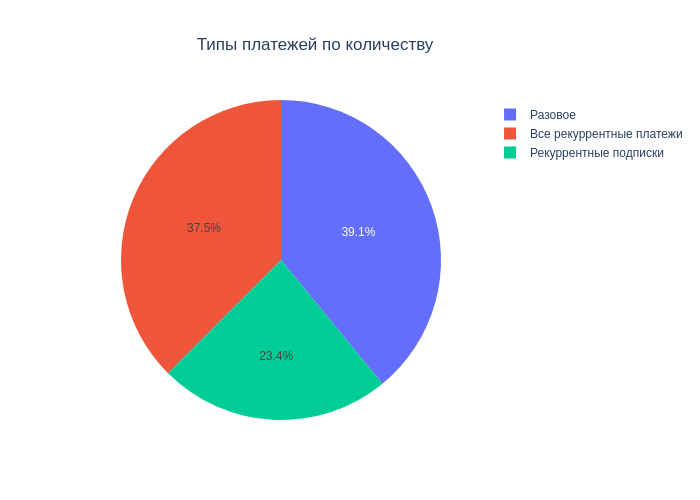

In [127]:
# применим функцию
df_pie_cnt('payment_type', 'Типы платежей по количеству')

               payment_type     sum
1                   Разовое  231705
0  Все рекуррентные платежи  125350
2     Рекуррентные подписки  119660


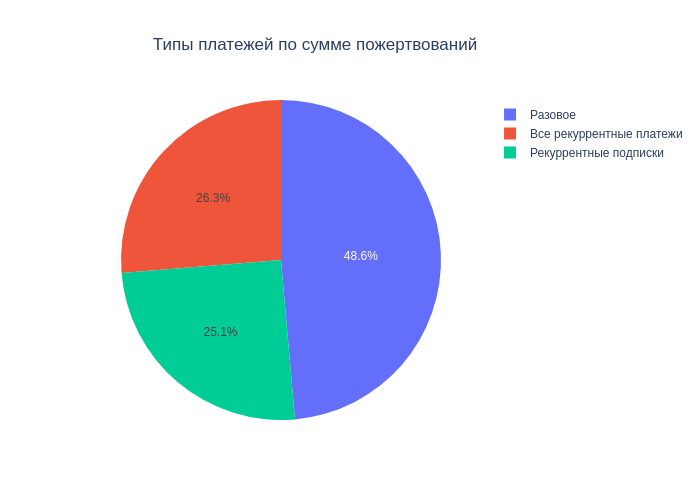

In [128]:
# применим функцию
df_pie_sum('payment_type', 'Типы платежей по сумме пожертвований')

Самый популярный тип платежа по количеству и сумме пожертвованией - разовый. Далее идут все рекуррентные платежи и рекуррентные подписки.

## 3.3 Распределение операторов платежей

      payment_operator  cnt
0        CloudPayments  572
1               ЮKassa    4
2            Квитанции    3
3  Текстовое сообщение    1
4              MIXPLAT    1


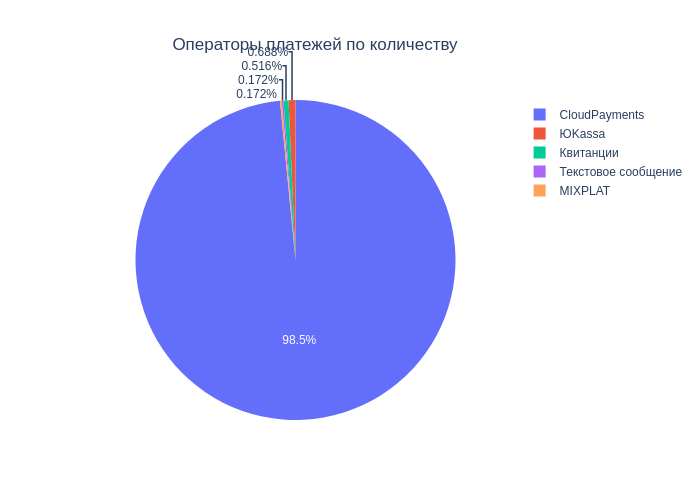

In [129]:
# применим функцию
df_pie_cnt('payment_operator', 'Операторы платежей по количеству')

      payment_operator     sum
0        CloudPayments  473955
2            Квитанции    1470
4               ЮKassa    1050
3  Текстовое сообщение     210
1              MIXPLAT      30


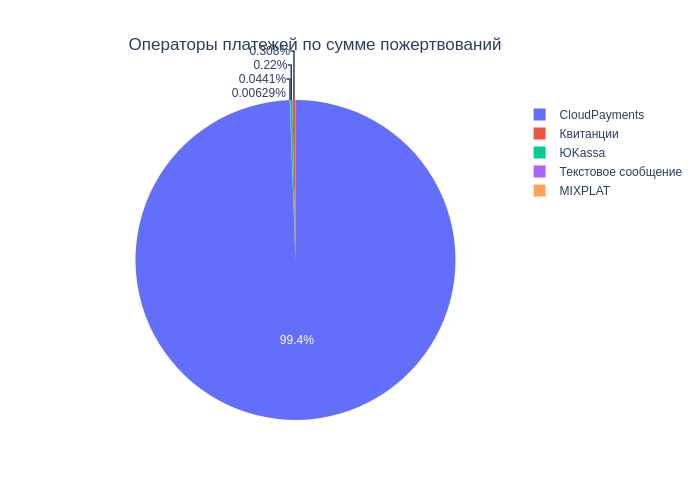

In [130]:
# применим функцию
df_pie_sum('payment_operator', 'Операторы платежей по сумме пожертвований')

Самый крупный оператор платежа - CloudPayments. Через него прошло 572 транзакции или 98.5% от общего числа и 473 955 рублей или 99.4%.

## 3.4 Распределение методов платежей

                   payment_method  cnt
0                Банковская карта  574
1  Банковская платёжная квитанция    3
2                          ЮMoney    2
3          Дополнительные способы    1
4           Платежи с помощью SMS    1


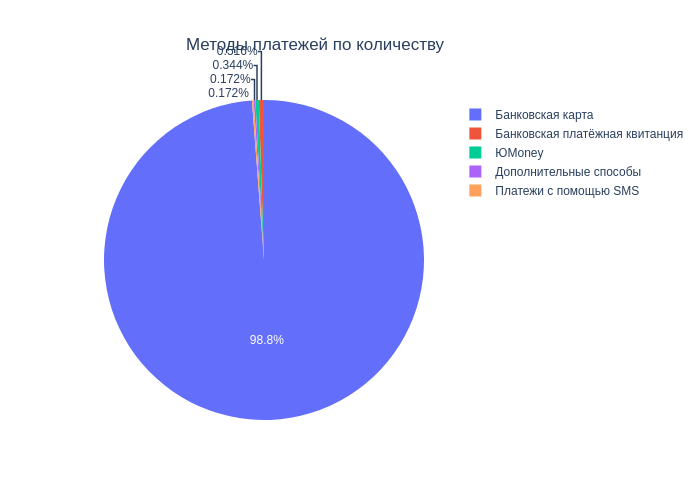

In [131]:
# применим функцию
df_pie_cnt('payment_method', 'Методы платежей по количеству')

                   payment_method     sum
0                Банковская карта  474355
1  Банковская платёжная квитанция    1470
4                          ЮMoney     650
2          Дополнительные способы     210
3           Платежи с помощью SMS      30


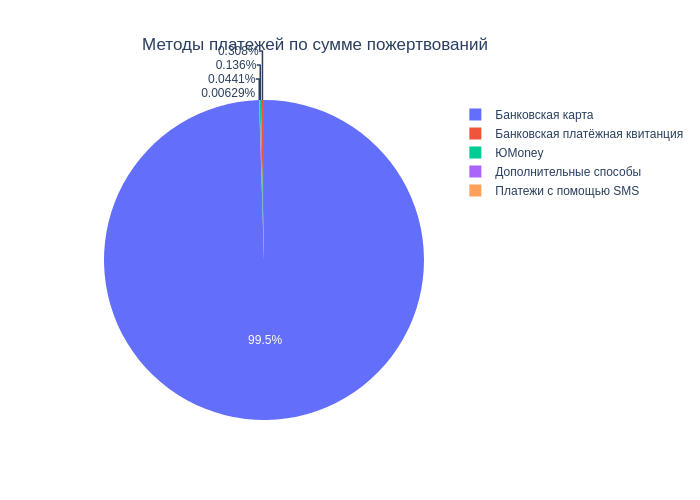

In [132]:
# применим функцию
df_pie_sum('payment_method', 'Методы платежей по сумме пожертвований')

Большинство платежей осуществляются посредством банковской карты - 574 платежа или 98.8% от общего числа и 474 355 рублей или 99.5%.

## 3.5 Распределение статусов

                      status  cnt
0                   Оплачено  433
1       Попытка пожертвовать  108
2  Платёж завершён с ошибкой   40


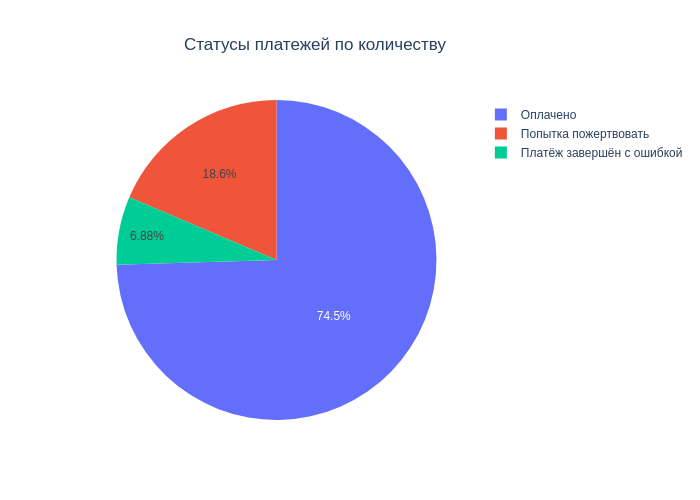

In [133]:
# применим функцию
df_pie_cnt('status', 'Статусы платежей по количеству')

                      status     sum
0                   Оплачено  351045
2       Попытка пожертвовать   93470
1  Платёж завершён с ошибкой   32200


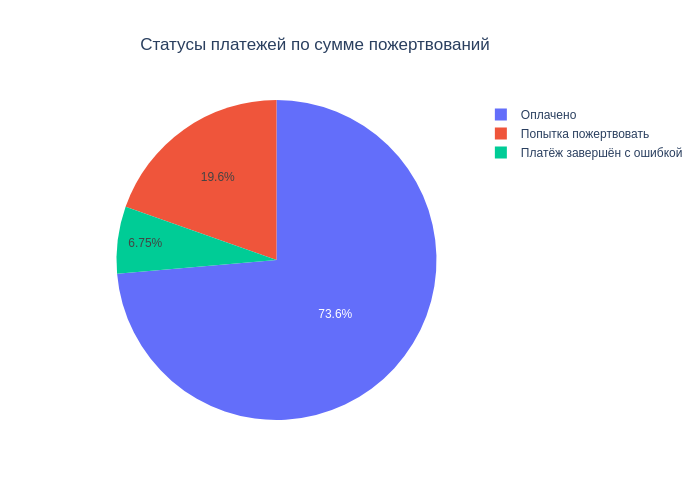

In [134]:
# применим функцию
df_pie_sum('status', 'Статусы платежей по сумме пожертвований')

Большинство пожертвований (433 или 74.5% и 351 045 рублей или 73.6%) были успешно оплачены. 108 или 18.6% и 93 470 рублей или 19.6% - Попытка пожертвовать, 40 или 6.88% и 32 200 рублей или 6.75% - Ошибка платежа.

## 3.6 Распределение подписок

  subscription  cnt
0          Нет  581


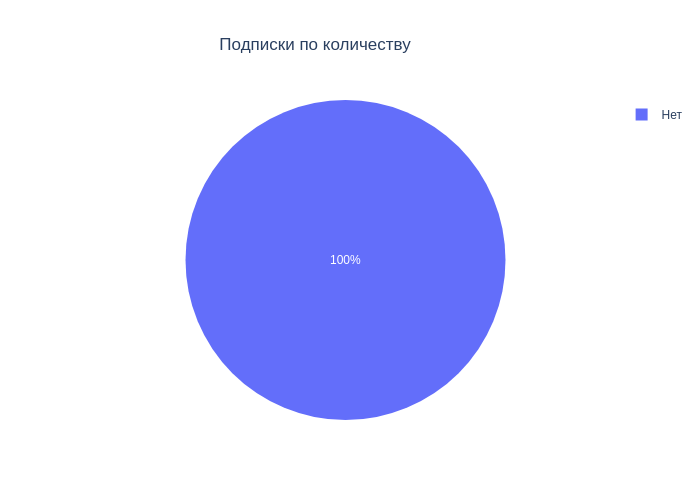

In [135]:
# применим функцию
df_pie_cnt('subscription', 'Подписки по количеству')

Ни у кого нет подписок. Нет смысла строить второй график.


## 3.7 Динамика пожертвований

### 3.7.1 Общая

Так как в датафрейме представлены данные за 269 дней, удобнее будет вычленить месяц из даты

In [136]:
# добавим столбец месяца
df_don['month_donation'] = (
    pd.to_datetime(df_don['date_donation']).dt.strftime('%Y-%m')
)
df_don.head()

,id,donor_id,payment_type,payment_operator,payment_method,sum,datetime_donation,status,subscription,date_donation,month_donation
0,1718,ba6dd3720fda6849141f824071088a35b53e5269ff8e99e288fc9e63016bbb06,Разовое,CloudPayments,Банковская карта,4500,2024-01-15 15:15:00,Оплачено,Нет,2024-01-15,2024-01
1,1717,ba6dd3720fda6849141f824071088a35b53e5269ff8e99e288fc9e63016bbb06,Разовое,CloudPayments,Банковская карта,4500,2024-01-15 15:10:00,Попытка пожертвовать,Нет,2024-01-15,2024-01
2,1715,bc934837f1cac51334c536e54b5c574d9f64acea7d45334ced3941c2b1cfffd7,Все рекуррентные платежи,CloudPayments,Банковская карта,300,2024-01-15 12:42:00,Оплачено,Нет,2024-01-15,2024-01
3,1714,41d91df30bf6a7a03a07f75a3e85304eab2913f1ecf3313a5303c213f6cf62f7,Разовое,CloudPayments,Банковская карта,750,2024-01-15 10:00:00,Оплачено,Нет,2024-01-15,2024-01
4,1713,41d91df30bf6a7a03a07f75a3e85304eab2913f1ecf3313a5303c213f6cf62f7,Разовое,CloudPayments,Банковская карта,750,2024-01-15 09:55:00,Попытка пожертвовать,Нет,2024-01-15,2024-01


In [137]:
don_dyn = df_don.groupby('month_donation', as_index=False).agg({'sum': 'sum'})
don_dyn

,month_donation,sum
0,2022-02,2760
1,2022-03,510
2,2022-04,3400
3,2022-05,12330
4,2022-06,11000
5,2022-07,10600
6,2022-08,11500
7,2022-09,3300
8,2022-10,4300
9,2022-11,3800


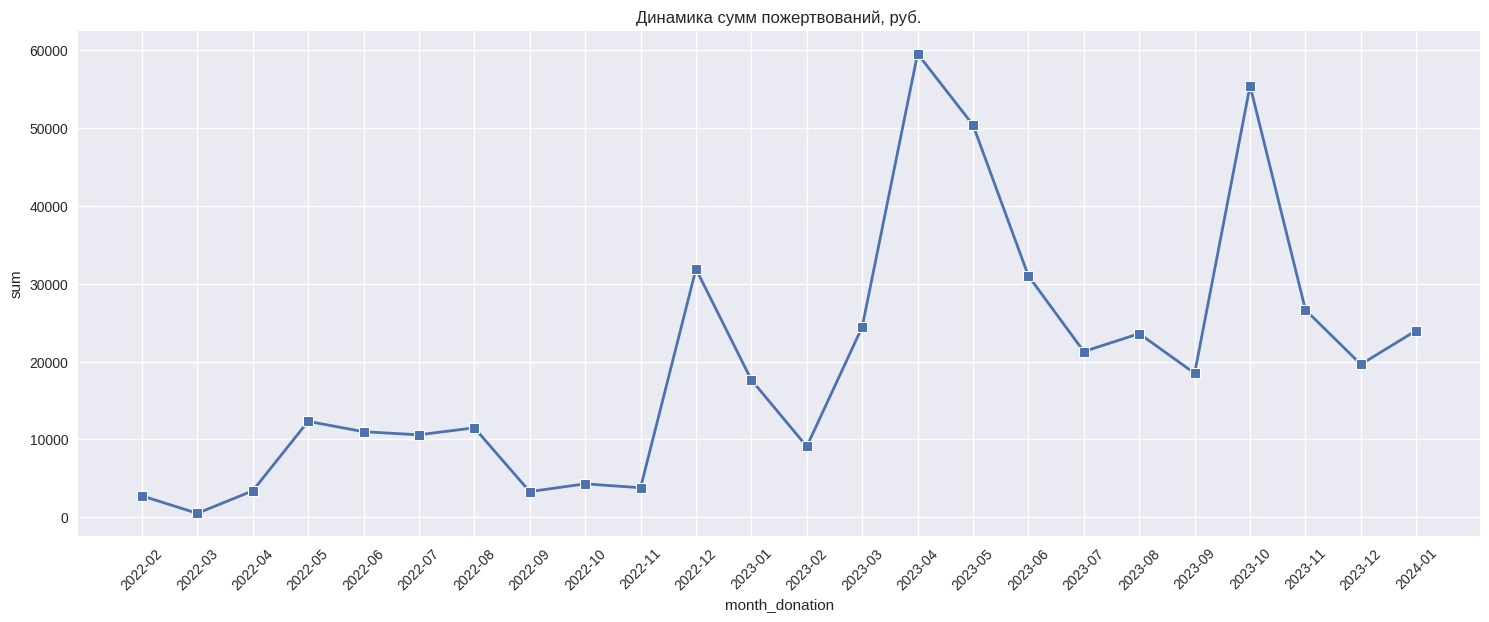

In [138]:
# построим линейный график
plt.figure(figsize=(15, 6))
sns.lineplot(data=don_dyn,
             x='month_donation',
             y='sum',
             linewidth=2,
             marker='s')
plt.title('Динамика сумм пожертвований, руб.')
plt.tight_layout()
plt.xticks(rotation=45);

На протяжении всего периода наблюдаются 3 резких скачка и спада. Большинство пожертвований было в апреле 2023.

### 3.7.2 По типу платежей

In [139]:
def dyn_val(col):
  # построим сводную таблицу
  df_group = df_don.pivot_table(index='month_donation',
                                columns=col,
                                values='sum',
                                aggfunc='sum').reset_index()
  # построим график
  plt.figure(figsize=(15, 6))
  sns.lineplot(df_group.melt('month_donation', var_name=col, value_name='sum'),
              x='month_donation',
              y='sum',
              hue=col,
              marker='s',
              linewidth=2)
  plt.xlabel('Дата')
  plt.ylabel('Пожертвования, руб.')
  plt.title(f'Динамика пожертвований по {col}')
  plt.tight_layout()
  plt.xticks(rotation=45);

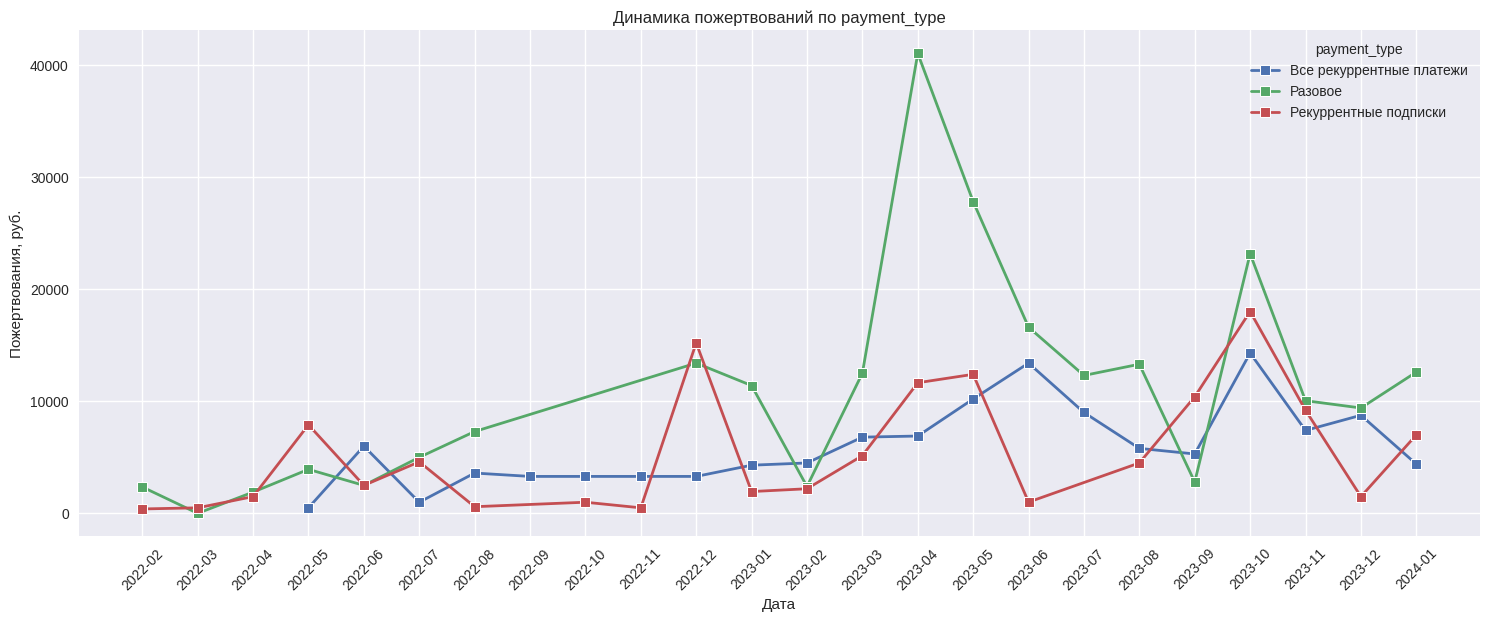

In [140]:
# применим функцию
dyn_val('payment_type')

Все рекуррентные платежи начались с мая 2022. Резкий скачок на общем графике возник из-за резкого скачка пожертвований разовых платежей. Возможно в этом месяце широко стала известно чья-либо история, либо была куплена реклама фонда, что и заинтересовало людей донатить больше.

### 3.7.3 По оператору платежей

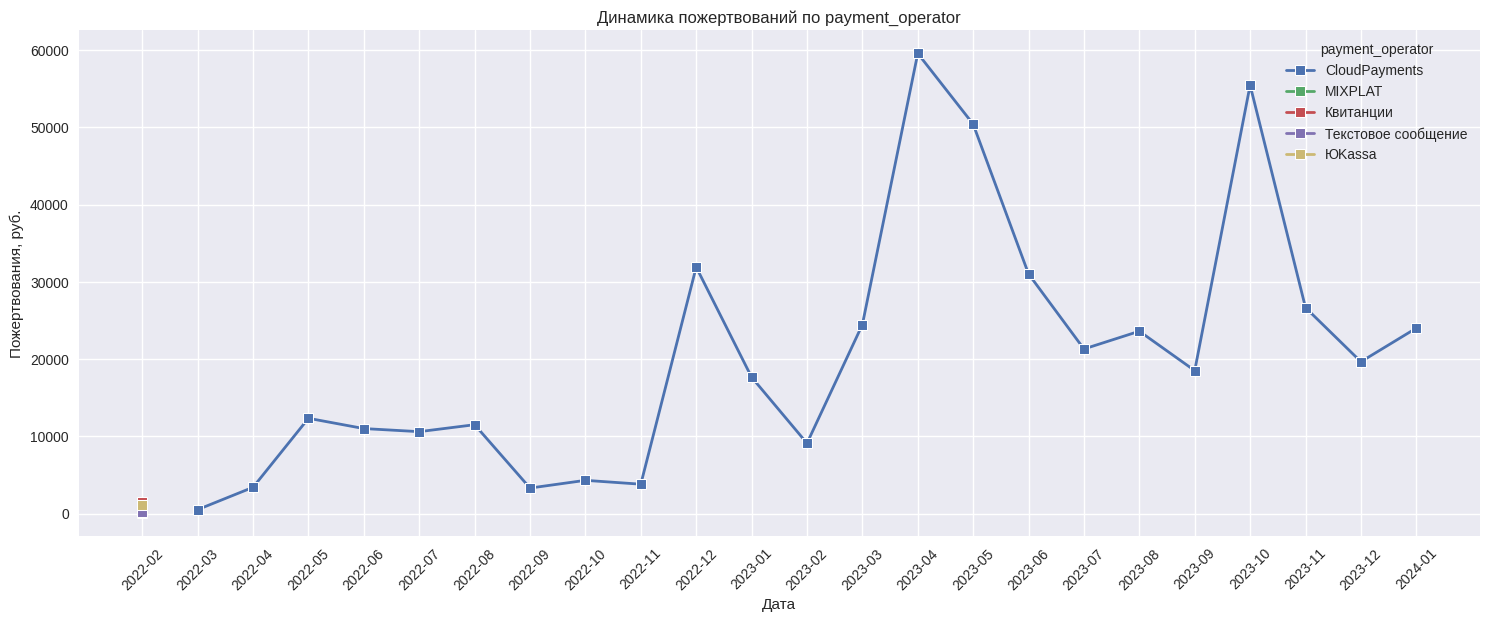

In [141]:
# применим функцию
dyn_val('payment_operator')

CloudPayments начал работать с марта 2022 и по сей день. Остальные виды платежей были только в феврале 2022. Видимо дальше фонд отказался от их использования.

### 3.7.4 По методу платежей

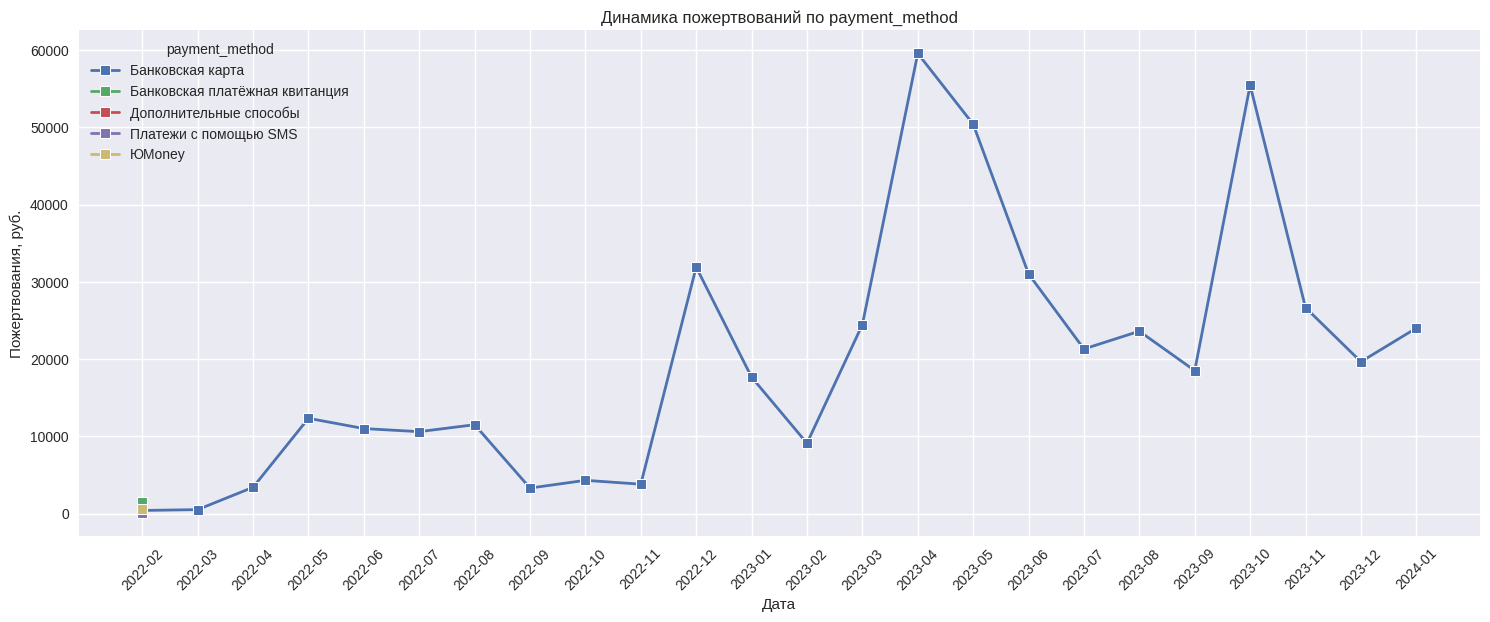

In [142]:
# применим функцию
dyn_val('payment_method')

Банковскими картами люди донатили на протяжении всего времени. Остальные методы платежа были только в феврале 2022.

# 4 Вывод

В ходе проведения предобработки данных о подопечных АНО "Рак Победим" были заполнены пропуски и данные приведены к формату из справочника. Из чего можно дать рекомендацию по сбору данных. При заполнении анкеты участником таких полей, как "Сфера деятельности", "Локализация/диагноз", "Стадия болезни", "Необходимая помощь", "Откуда узнали" и "Этап лечения", нужно давать конкретный список из справочника, чтобы подопечный мог проставить галочки, либо же указать ответ "Другое" и в письменной форме заполнить ответ. Для указания города проживания, если идет заполнение онлайн, то при вводе значения выдавать схожие результаты на выбор в стандартизованном виде. Эти рекомендации касаются сбора данных, произведенного на данном датафрейме. Судя по сайту, данные изменения уже были внесены.

Также был проведен исследовательский анализ данных доноров и выяснено следующее:
- количество транзакций - 581, доноров - 229. Некоторые доноры вносят пожертвования несколько раз;
- общая сумма пожертвований за 269 дней составила 476 715 рублей. Средняя сумма - 820 рублей;
- самый популярный тип платежа по количеству и сумме пожертвованией - разовый;
- самый крупный оператор платежа - CloudPayments. Через него прошло 572 транзакции или 98.5% от общего числа и 473 955 рублей или 99.4%;
- большинство платежей осуществляются посредством банковской карты - 574 платежа или 98.8% от общего числа и 474 355 рублей или 99.5%;
- большинство пожертвований (433 или 74.5% и 351 045 рублей или 73.6%) были успешно оплачены. 108 или 18.6% и 93 470 рублей или 19.6% - Попытка пожертвовать, 40 или 6.88% и 32 200 рублей или 6.75% - Ошибка платежа;
- ни у кого нет подписок
- большинство пожертвований было в апреле 2023;
- резкий скачок на общем графике динамики пожертвований возник из-за резкого скачка пожертвований разовых платежей. Возможно в этом месяце широко стала известно чья-либо история болезни, либо была куплена реклама фонда, что и заинтересовало людей донатить больше;
- CloudPayments начал работать с марта 2022 и по сей день. Остальные виды платежей были только в феврале 2022. Видимо дальше фонд отказался от их использования;
- банковскими картами люди донатили на протяжении всего времени. Остальные методы платежа были только в феврале 2022.
